In [1]:
# importing important libaries 

import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warning
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Normalization
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# reading the dataset

df=pd.read_csv(r'C:\Users\DELL\Documents\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Getting information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that the data set has 35 columns including the target(Label) and 1470 rows.The data is consist of categorical columns and continuous columns. It seems like it has no null values, however we will reconfirm using isna().

In [4]:
#finding null values
df.isna().sum().any()

False

'False' indicates no null values. We can conclude that as it doesnot have any null values, it is safe to proceed further.

In [5]:
# Listing the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#datatype of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Our dataset can roughly divide into following category:
1. Categorical/Nominal : Variables that can be divided into multiple categories but having no order or priority. Eg. Business Travel ('Travel_Rarely', 'Travel_Frequently', 'Non-travel').
2. Binary: A subtype of categorical features, where variable has only two values. Eg. Gender(M/F).
3. Continous: They can take up any value bewtween the minimum and maximum values in a column. Eg. Age, Monthly income, Total working years etc.
4. Useless: They don't contribute to the final outcome of a ML model. Here,as of now we can see that 'EmployeeCount' and 'StandardHours' is having same value through out the Column i.e '1' and '80' respectively. 


In [7]:
# statistical description:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From above also we can see that "EmployeeCount" and "StandardHours" posses same value throughout the column, which means if we drop them, it does not impact the output much.


Let's Drop "EmployeeCount" and "StandardHours" Before proiceeding further.

In [8]:
df= df.drop(columns=['EmployeeCount', 'StandardHours'], axis=1)

In [9]:
#checking the shape of  dataset
df.shape

(1470, 33)

In [10]:
#seeing dataset one more time
df.head(10).T    #transpose is use to see all the columns 

,0,1,2,3,4,5,6,7,8,9
Age,41,49,37,33,27,32,59,30,38,36
Attrition,Yes,No,Yes,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591,1005,1324,1358,216,1299
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27
Education,2,1,2,4,1,2,3,1,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical
EmployeeNumber,1,2,4,5,7,8,10,11,12,13
EnvironmentSatisfaction,2,3,4,4,1,4,3,4,4,3


we can observe that Over18 also contain only Y in each column, It means this column also don't add any additional information, which can be used in model building. So we will drop This column as well. One more thing can be observe that the EmployeeNumber looks like number assigned to the employee, which I don't think will add any value to our ML Model, it is just like an id.So we can drop that as well.

In [11]:
# Dropping column 'Over18' and 'EmployeeNumber'from the dataset.

df=df.drop(columns=['Over18', 'EmployeeNumber'], axis=1)
df.shape    # checking dimension

(1470, 31)

In [12]:
#Checking unique value in performance rating column, as we can seeing only two values so far.
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

As we can clearly see that it has only two values in it, I am not so sure if this column has any impact on our model, we will decide about it once we see the correlation matrix.  ****

In [13]:
# Let's check the employee attrition rate. i.e number of employee say No and stay in company vs number of employee say yes and left.
# we are using value_counts function.

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

The dataset seems little imbalanced as the yes-no ratio is quite big . Although the company might be happy as attrition rate is low. More and more number of employees wants to stayed with the company. However, before making any final decison let's start with EDA.

# EDA

<AxesSubplot:xlabel='Attrition', ylabel='count'>

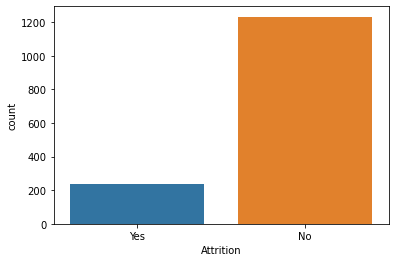

In [14]:
# Visualizing the Target column:
sns.countplot(df['Attrition'])

Here, Yes denotes the employees who left the company while No denotes to the employee who stayed with the company. Here we can Observe that the class(Yes-No) is moderately imbalanced, So when we build the model we need to balance them, so that our model is not baised.

<function matplotlib.pyplot.show(close=None, block=None)>

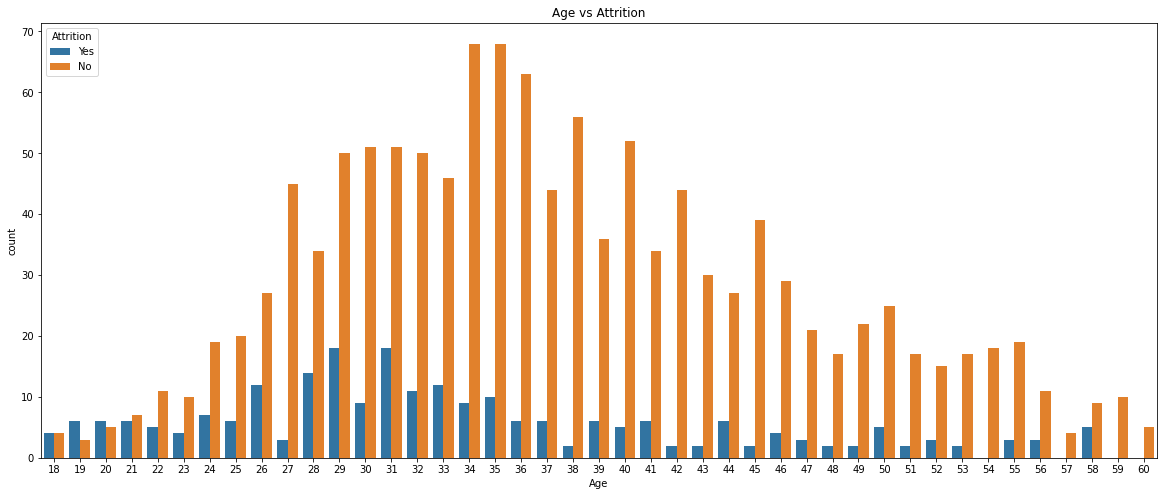

In [15]:
# Lets see how Age and Attrition is correlated.
plt.figure(figsize=(20,8))
ax=plt.subplot()
sns.countplot(x='Age', hue='Attrition', data = df, ax = ax)
plt.title("Age vs Attrition")
plt.show


We can observe that the Age where is hightest attrition is 29 and 31. While the age with high retention(i.e.Company retain the employee) is 34-35. We can also observe that people as they reached near their retirement tent to retain with the company as we can see 57-59-60 has zero attrition values.

<function matplotlib.pyplot.show(close=None, block=None)>

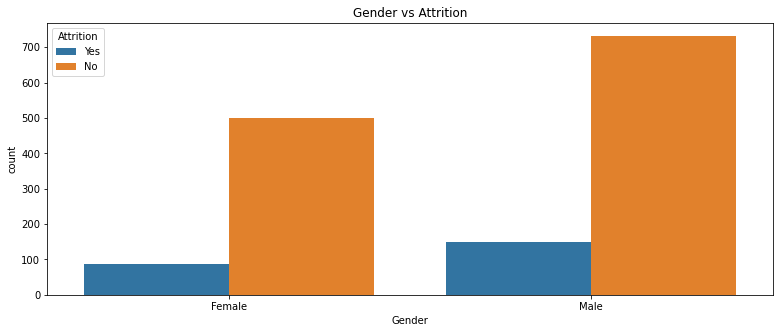

In [16]:
# Correlation of Attrition with gender
plt.figure(figsize=(13,5))
ax=plt.subplot()
sns.countplot(x='Gender', hue='Attrition', data = df, ax = ax)
plt.title("Gender vs Attrition")
plt.show



We can observe that the ratio is almost same for attrition, I don't think Gender contribute much in the attrition rate.Before concluding, We will cross check it. ****

<function matplotlib.pyplot.show(close=None, block=None)>

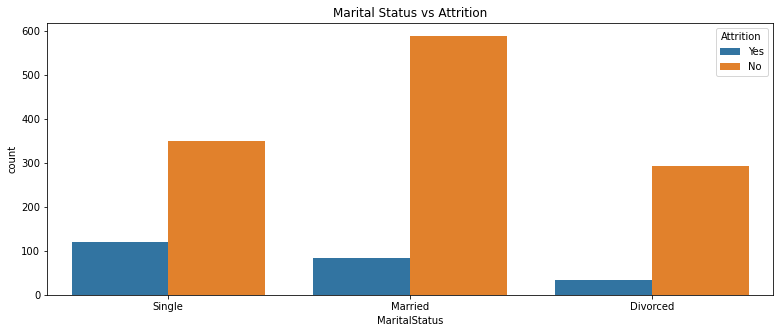

In [17]:
# Correlation of MaritalStatus with attrition
plt.figure(figsize=(13,5))
ax=plt.subplot()
sns.countplot(x='MaritalStatus', hue='Attrition', data = df, ax = ax)
plt.title("Marital Status vs Attrition")
plt.show


It's interesting to observe that Single person tend to left the company quite easily. So we can see a high attrition rate there. 

<function matplotlib.pyplot.show(close=None, block=None)>

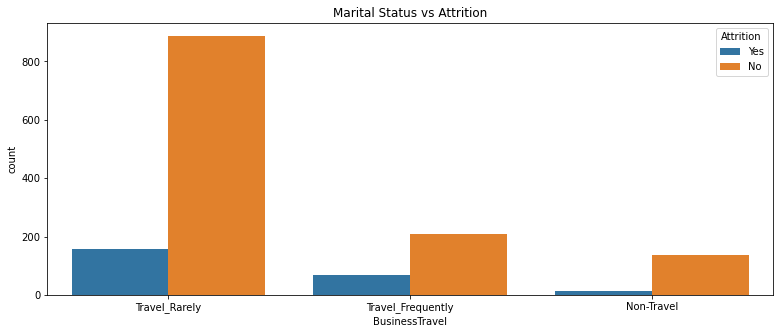

In [18]:
#Correlation of BusinessTravel With Attrition
plt.figure(figsize=(13,5))
ax=plt.subplot()
sns.countplot(x='BusinessTravel', hue='Attrition', data = df, ax = ax)
plt.title("Marital Status vs Attrition")
plt.show


We  can observe that the Non -Travel employees attrition rate is really low so as its retention rate is low. It seems like yes:no ratio for the 3 classes here is similar, I can't definitely say if attrition rate depends much on Business travel. ****



Before Moving any further let's check the categorical Columns and there value counts for their classes.


In [19]:
#Since categorical column has object datatype we will print all of the object data types and their unique values.

for column in df.columns:
    if df[column].dtype == object:    #checking datatype for each column if it is 'object'
        print(str(column) + ' : ' + str(df[column].unique()))   #unique() gives all the unique value of that column 
        print(df[column].value_counts())  # value_counts() count the number belongs to different class in that column
        print("\n _________________________________________________________________\n")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

 _________________________________________________________________

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 _________________________________________________________________

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 _________________________________________________________________

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

 ______________________________________________________________

<function matplotlib.pyplot.show(close=None, block=None)>

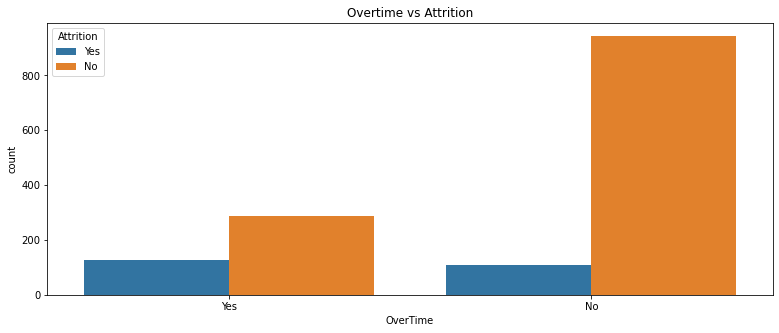

In [20]:
#correlation of Overtime and attrition
plt.figure(figsize=(13,5))
ax=plt.subplot()
sns.countplot(x='OverTime', hue='Attrition', data = df, ax = ax)
plt.title("Overtime vs Attrition")
plt.show


It is interesting to observe that people retain with company where they don't need to do Overtime.

<function matplotlib.pyplot.show(close=None, block=None)>

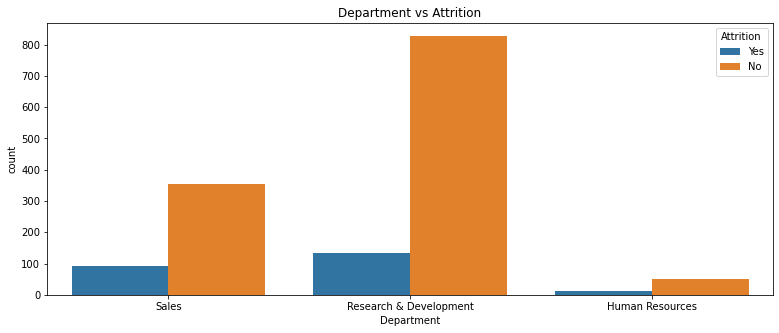

In [21]:
# Let's see How department is correlated to Attrition
plt.figure(figsize=(13,5))
ax=plt.subplot()
sns.countplot(x='Department', hue='Attrition', data = df, ax = ax)
plt.title("Department vs Attrition")
plt.show


we can observe that the attrition and retention rate are high in Research & Development Dept, which is kind of obvious. while Attrition and retention rate is very low in Human Resources.

<function matplotlib.pyplot.show(close=None, block=None)>

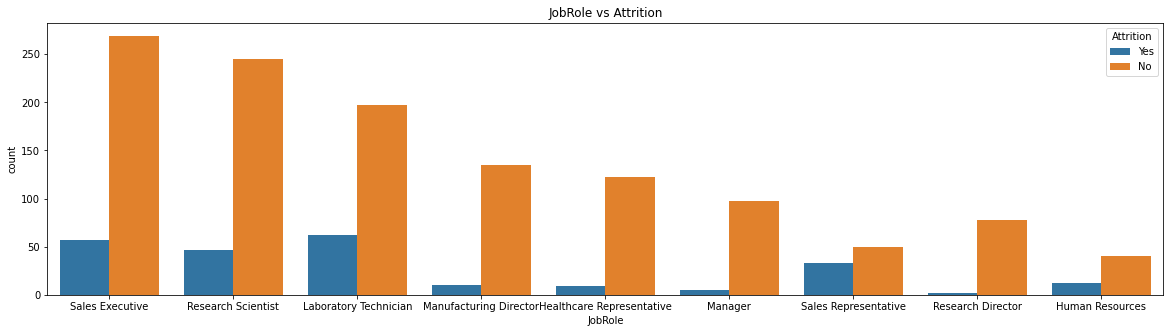

In [22]:
# Let's see how JobRole is correlated with attrition
plt.figure(figsize=(20,5))
ax=plt.subplot()
sns.countplot(x='JobRole', hue='Attrition', data = df, ax = ax)
plt.title("JobRole vs Attrition")
plt.show


We can see that the attrition rate for higher positions like director and above is very low, employee and higher positions tents to stay with the company. Also company tries to retain people with such experience and knowledge. Besides that we also observe that sales executiv has both high attrition and retention rate, we know that these are the people bring business to the company so retaining them is really important, and they left as well when they see better opportunity some where else.



Before moving ahead Lets divide our data into two category,Continuous columns and categorical column.
As moving forward outlier detection and skewness check will only be performed at continuous data only. And also visual analysis of Continuos data is pending. 

In [23]:
# Dividing continuous and categorical data
data_cat=df[['Attrition', 'BusinessTravel', 'Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]

data_conti=df.drop(data_cat, axis=1)

print(data_cat.shape)
print(data_conti.shape)

(1470, 8)
(1470, 23)


In [24]:
data_conti.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

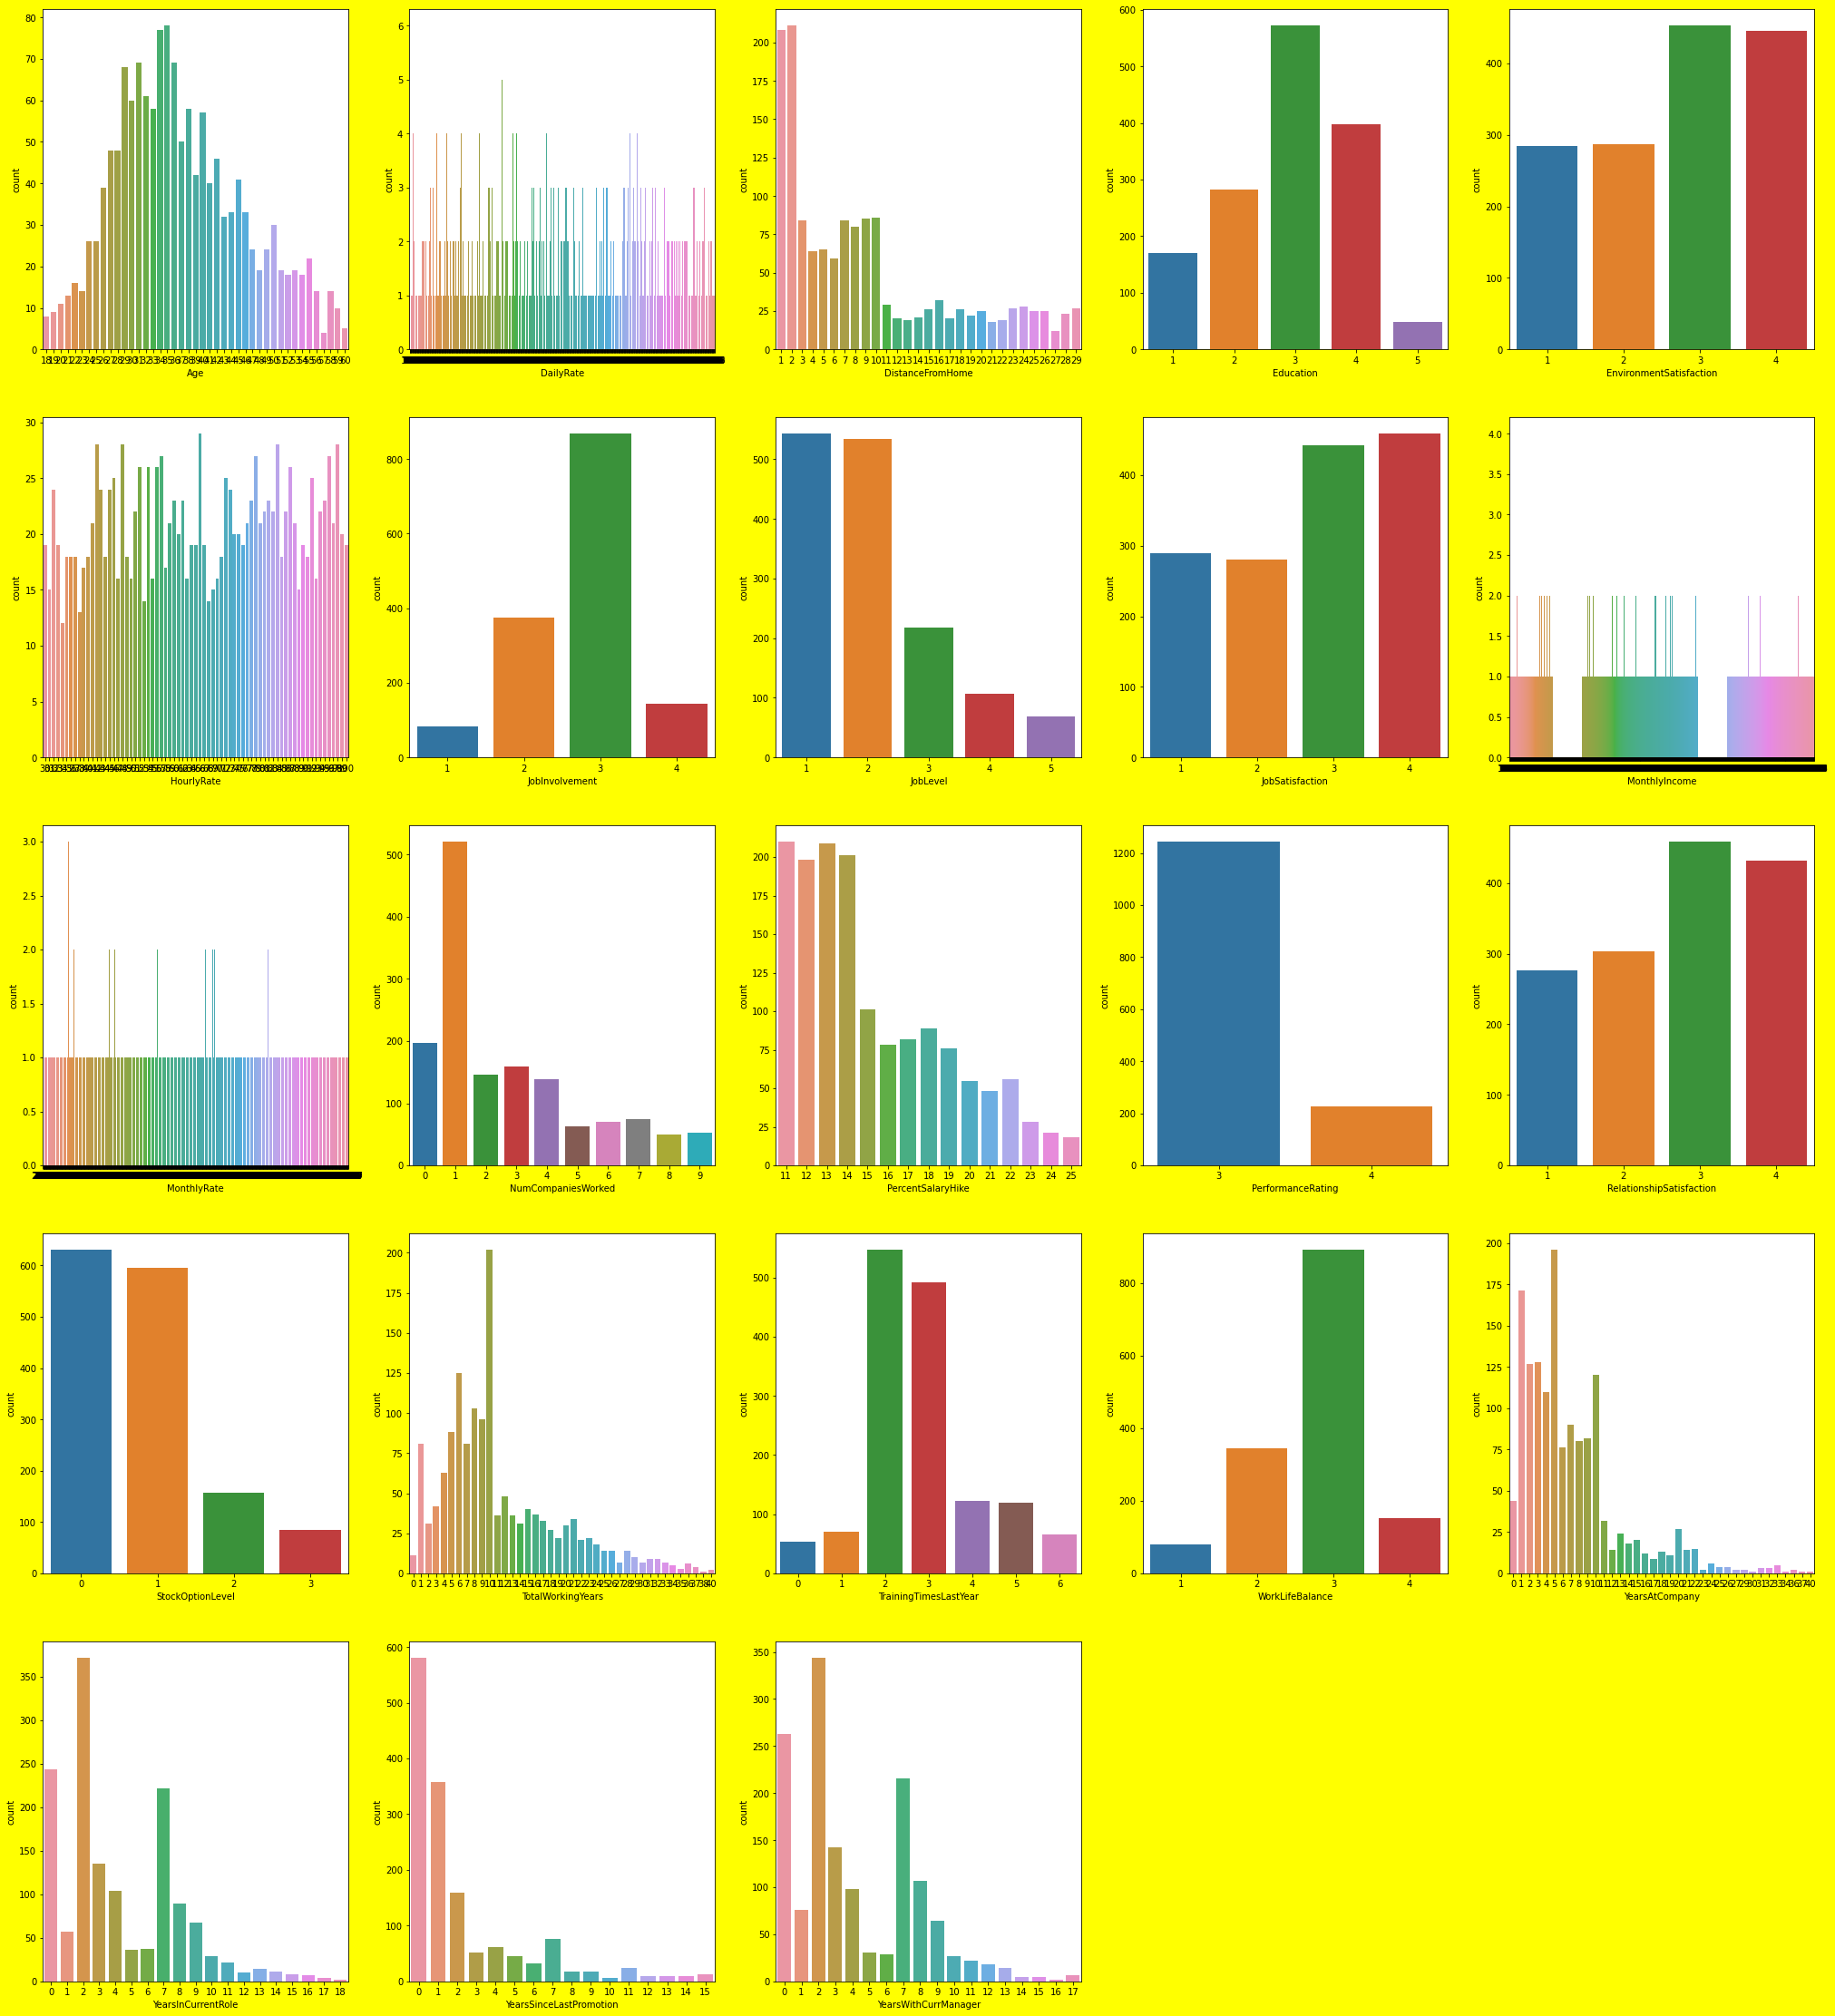

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(35,40),facecolor='yellow')
plotnumber=1

for column in data_conti:
    if plotnumber<=23 :
        ax=plt.subplot(5,5,plotnumber)
    
        sns.countplot(data_conti[column])
        plt.xlabel(column, fontsize=10)
        
    
    plotnumber+=1
plt.show()

1. We can observe that here data is more or less discrete in nature.
2. Performance rating has only two values, 3 & 4. We can say that it may be less correlated data.
3. And also I think Education also don't place any vitol role in attrition. Let's do some more analysis to see how data is related with our target variable.
4. We can clearly see some skewness in the data, which we will treat further in the process.

In [26]:
# Let's see correlation of Continuous data among each other
corr= df.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


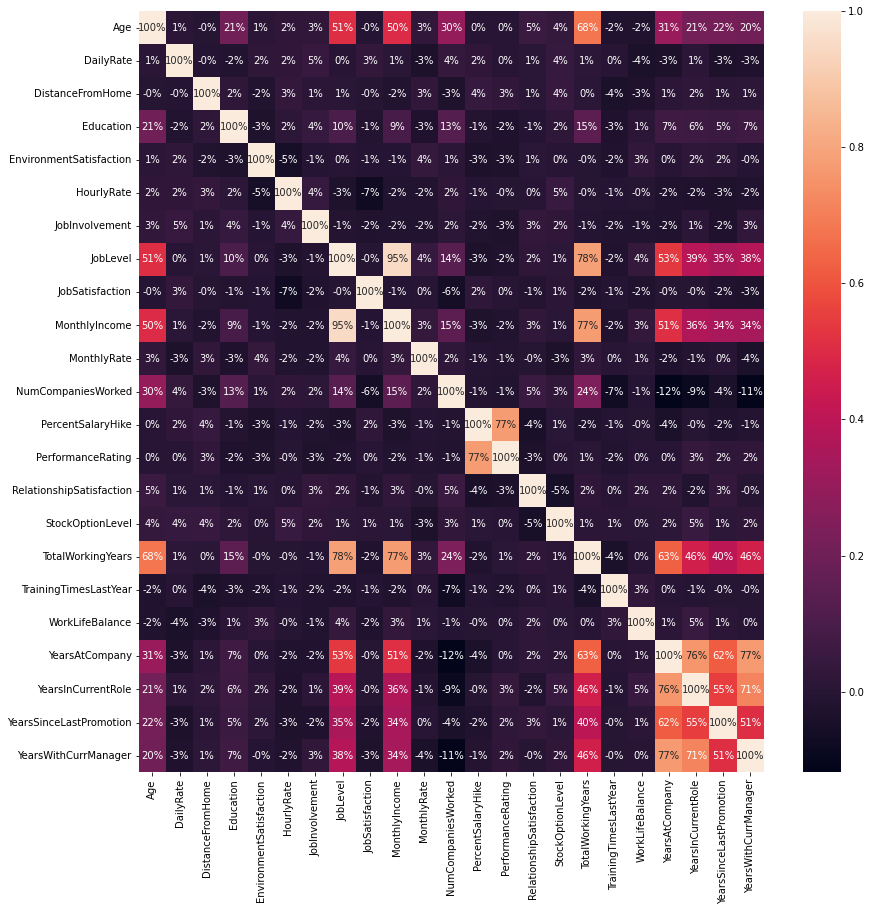

In [27]:
# let's visulaize it, using Heatmap
# plotting correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

Seeing this it seems that certain features are correlated, Lets check for Multicollinearity.
Also This data contain so many features, We will select top 80% of the features using selectK best.

We can observe that there is remarkable correlation exist between MonthlyIncome and JobLevel let's confirm that using scatter plot and if the correlation is confirmed we can drop one of the column depending upon their correlation with attribution. 



<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

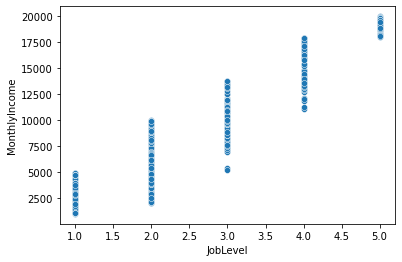

In [28]:
# checking correlation between MonthlyIncome and JobLevel using scatter plot
sns.scatterplot(df['JobLevel'], df['MonthlyIncome'])

From here we can observe that , our JobLevel and MonthlyIncome are highly correlated as One increases the value of other also increases, we can remove one of them, as it causes multicolinearity. ****

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

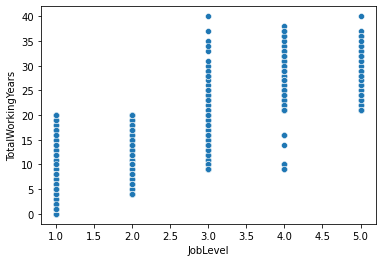

In [29]:
# JobLevel and TotalWorkingYear scatterplot
sns.scatterplot(df['JobLevel'], df['TotalWorkingYears'])

This shows some correlation but its not definite, as the value of one increases the value for other increases after certain point, it definitely has pattern but they don't seems much correlated to me at this point, We will check afterwards if the multicollinearity exist or not. For now I can wait till further steps to make any conclusion.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

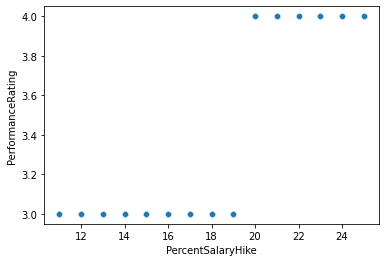

In [30]:
# PercentSalaryHike and PerformanceRating
sns.scatterplot(df['PercentSalaryHike'],df['PerformanceRating'])

We can clearly observe that, if the value of one increases, the value for other also increases. Hence, we can say that they are correlated, And we can drop one of the column. For dropping the column we need to check how they are correlated with our label i.e. 'Attrition'. ****

<Figure size 720x504 with 0 Axes>

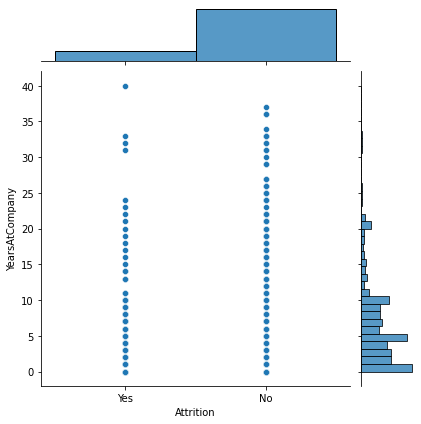

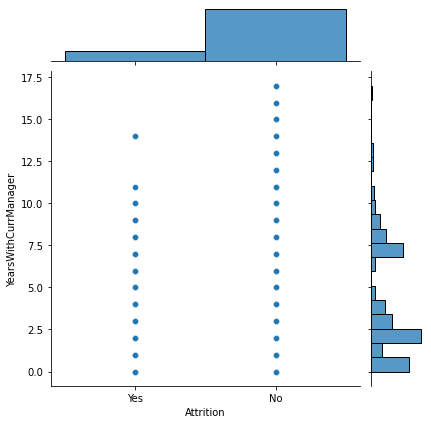

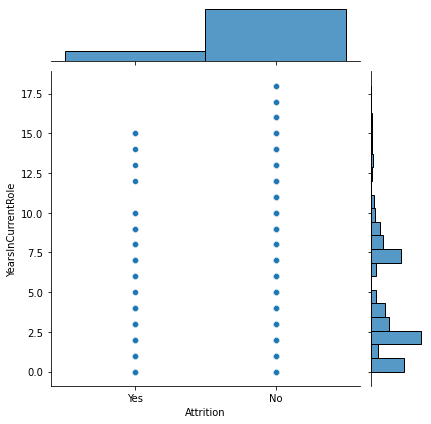

In [31]:
#'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole'

plt.figure(figsize=(10,7))
sns.jointplot(data=df, x='Attrition', y='YearsAtCompany')
sns.jointplot(data=df, x='Attrition', y='YearsWithCurrManager')
sns.jointplot(data=df, x='Attrition', y='YearsInCurrentRole')



Before predicting anything, lets take a look at their correlation with attrition together, for that we can use corr with function. We will perform some more visualization before converting the categorical data to numerical. And then we perform correlation analysis. 

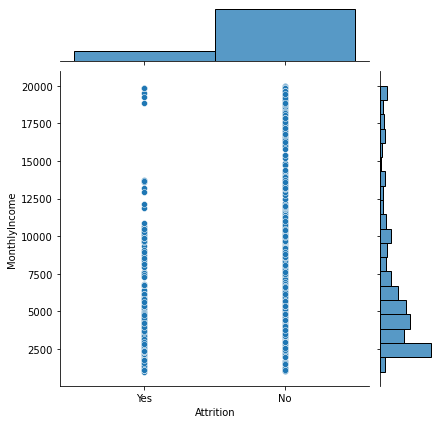

In [32]:
#let's check MonthlyIncome is related to attrition
sns.jointplot(x='Attrition',y='MonthlyIncome', data=df)

We can say that employee with higher income will stay with the company while employee with monthly income under 10000 tends to left easily. 

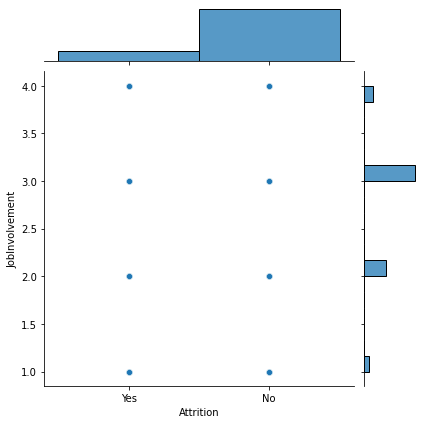

In [33]:
# Let's check how JobInvolvement is related to attrition
sns.jointplot(x='Attrition', y='JobInvolvement', data=df)

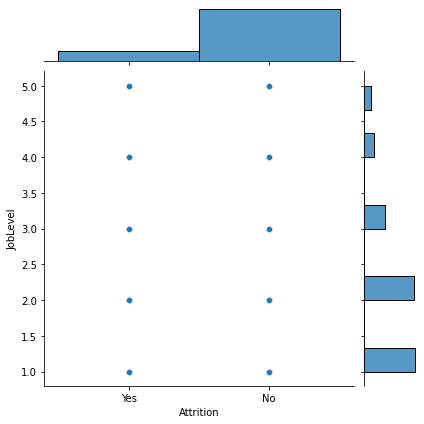

In [34]:
#JobLevel and attrition
sns.jointplot(x='Attrition', y='JobLevel', data=df)

These plot give us some idea about our data, how feature and label is correlated. Let's encode our categorical data before many some more analysis. As our label is also in categorical form, we will find the final correlation matrix once we encode our data.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

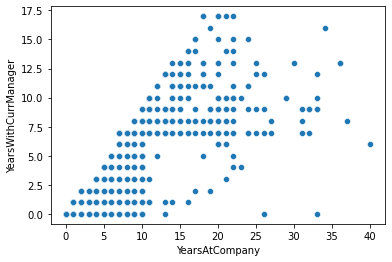

In [35]:
sns.scatterplot(df['YearsAtCompany'], df['YearsWithCurrManager'])

We can see that there exist correlation between YearsWithCurrmanager and YearsAtCompany, By see their correlation with attrition we can drop one of them.

# Encoding

Let's do Label Encoding, As we already had so many columns and non of them has oridinal type data. This will help us to simplify the dataset. 

In [36]:
#coverting categorical data to numerical form.

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()

In [37]:
for column in df.columns:
        if df[column].dtype == 'int64':   #This will filter all numerical data.
            continue
        df[column] = lab_enc.fit_transform(df[column])

In [38]:
#let's see how our datset looks like now.
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,3,1,...,3,2,2,17,3,2,7,7,7,7


In [39]:
df.isnull().sum()  # checling for null values one more time

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Dataset looks good, Now we can proceed further. As we can see that there is so many features in this data set, and all of them seems not that correlated with label. Let's first check the correlation of continuous data with attrition

In [40]:
# Just find the correlation of continuous features vs target using corr with
data_conti.corrwith(df.Attrition)

Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
dtype: float64

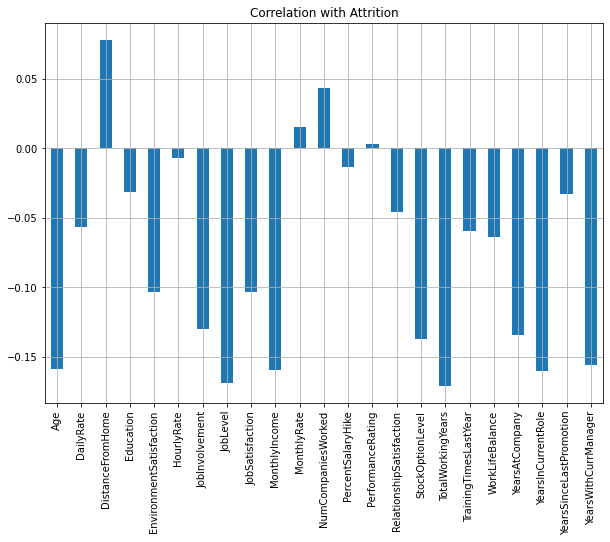

In [41]:
# Visualizing this correlation
data_conti.corrwith(df.Attrition).plot(kind='bar', grid= True, figsize=(10,7),
                                                  title="Correlation with Attrition")

plt.show()

Data can be positively or negatively correlated. There correlation degree matters.

We can observe that 'TotalWorkingYears', 'JobLevel','MonthlyIncome', 'Age','YearsInCurrentRole' these are the features which are highly correlated with attrition, while 'Performance Rating' and 'HourlyRate' shows least correlation with our target label i.e. attrition.

From here we can decide which column to drop, as we have seen correlation between independent variables like MonthlyIncome and JobLevel, PerformanceRating and PercentSalaryHike.


We can clearlydrop PerformanceRating. And to decide among MonthlyIncome and JobLevel We can draw correaltion matrix, as the values are visible clearly there.

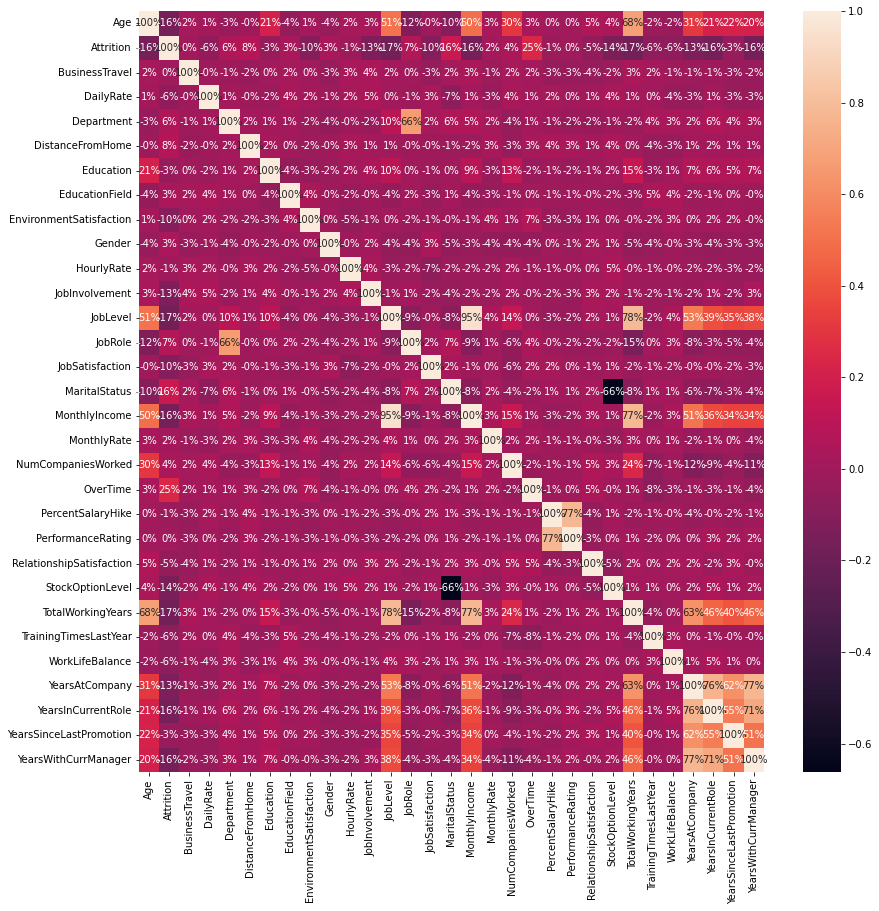

In [42]:
#correlation matrix
# let's visulaize it, using Heatmap
# plotting correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot= True, fmt='.0%')
plt.show()

We will keep JobLevel and drop MonthlyIncome, as Joblevel show strong relation compare to MonthlyIncome. And for PerformanceRating we can drop it as it shows 0 correlation with label. From here We can also observe that BusinessTravel also show 0% correlation with attrition, so we can drop that as well.
We also See that HourlyRate and PercentSalaryHike shows only 1% correlation with Attrition. In my opinion we can drop that as well. 

We can drop YearsAtCompany as well as it is correlated with YearsWithCurrManager

In [ ]:
# Dropping unwanted columns.
df=df.drop(columns=['MonthlyIncome','PerformanceRating','BusinessTravel','HourlyRate','PercentSalaryHike'], axis=1)
df.shape   #checking the dimension

In [45]:
df=df.drop(columns='YearsAtCompany', axis=1)
df.shape

(1470, 25)

Dropping these column help us to reduce MultiCollinearity and unwanted noise. Therefore, help us in building a better model.
Before Moving any further lets do some some Visualization just to check our data is in line.

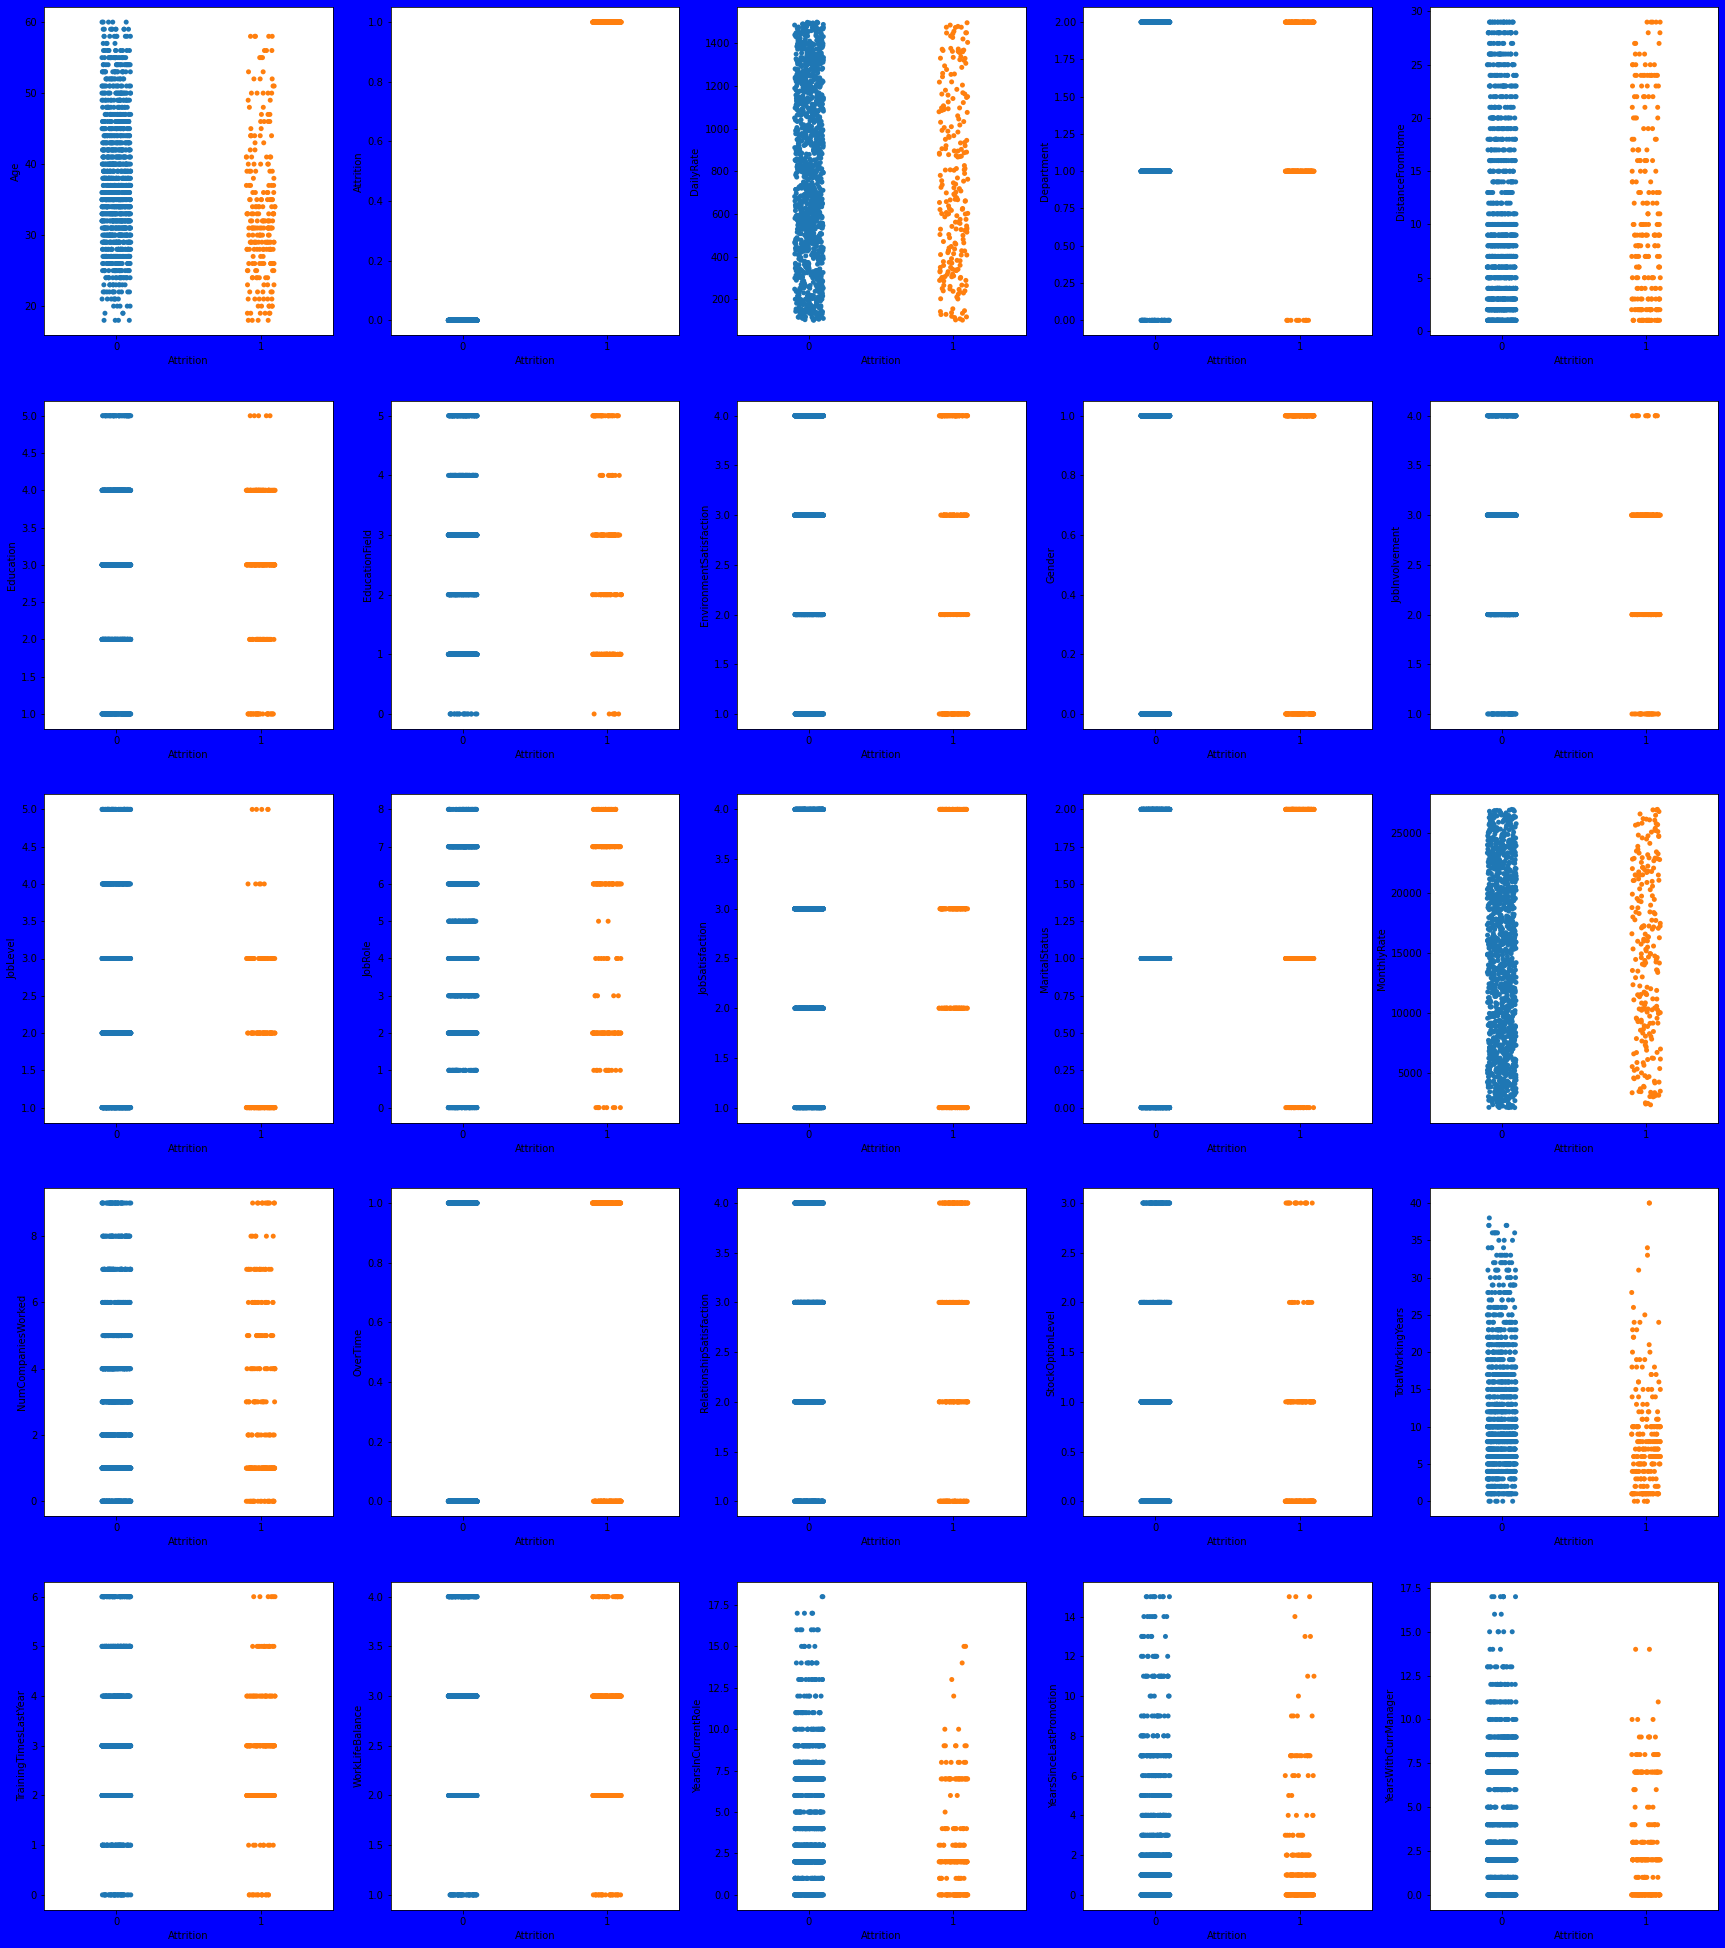

In [46]:
# Let's see each feature is related to label
plt.figure(figsize=(30,35), facecolor='blue')
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.stripplot(df.Attrition,df[column])
    plotnumber+=1
plt.show()

Great!! Our second plot is attrition vs attrition, so just ignore that. Rest data looks fine we will proceed by checking for skewness and outlier first, then will see for Multicolinearity if it is still there for that we will use VIF. 

# skewness and outliers


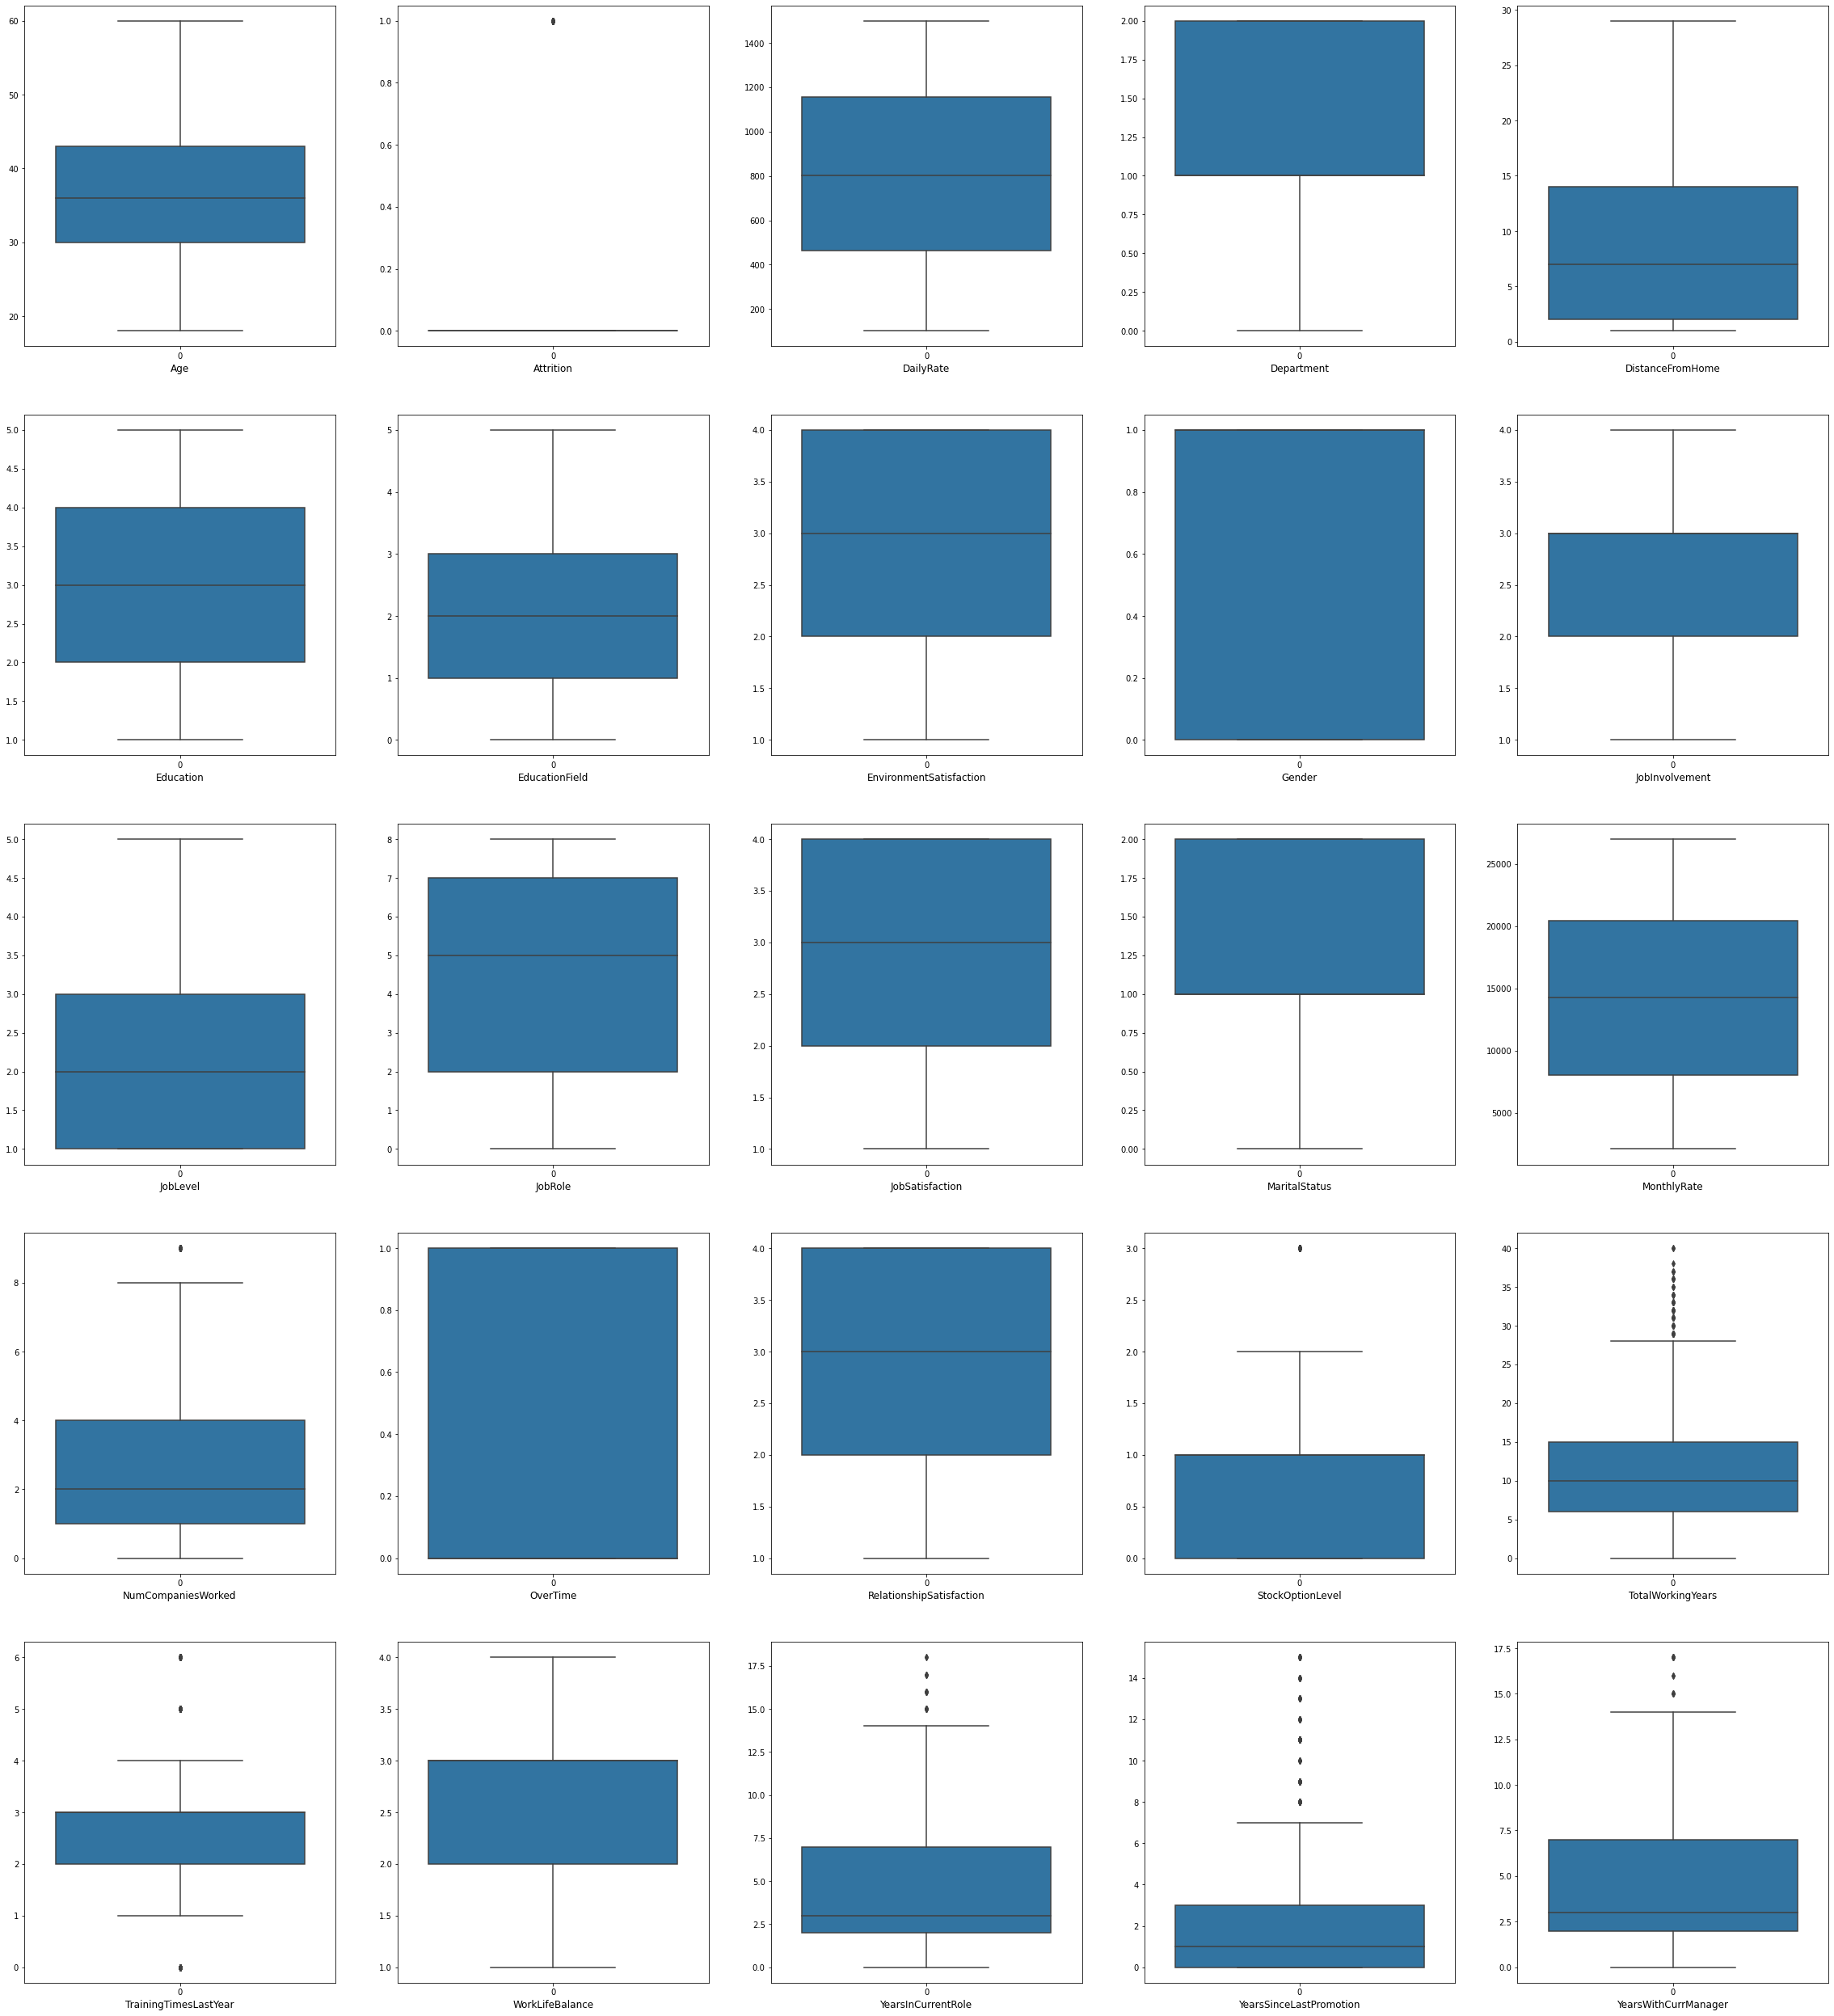

In [47]:
#Visualize the Outlier using BOXPLOT 

plt.figure(figsize=(40,45))
graph=1
for column in df:
    if graph<=25:      #25 denotes total number of columns
        plt.subplot(5,5,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

Outliers can be detected in few columns involving NumCompaniesWorked, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager. But We are not so sure that they are outliers or not, cause in corporate scenario it has been observed many times that certain set of employee gets certain priviledge based on there performance and position like higher salary, better stocks and share etc. 

So keeping those thing in mind, lets check skewness first before removing the outliers.


In [48]:
#As we don't perform skewness on categorical data and label, we will ignore those columns.

df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

We can observe that some of our data is highly skewed even we take the threshold of +/-0.5, So let's remove the skewness using PowerTransform

In [49]:
# using PowerTransform for skewness
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')   

In [53]:
# Create a list of all features having skewness more that +/-0.5, keeping in mind Label and categorical column cannot be included.
features=['Age', 'DistanceFromHome', 'JobLevel', 'NumCompaniesWorked','StockOptionLevel', 
          'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']  

In [54]:
df[features]=scaler.fit_transform(df[features].values)

In [55]:

df[features]

,Age,DistanceFromHome,JobLevel,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,-1.494085,0.241622,1.621331,-1.087933,-0.244305,-2.579073,-2.144446,0.205562,-1.094862,0.490147
1,1.276411,0.243416,0.241622,-0.571302,0.548969,0.052495,0.217384,0.276821,0.883888,0.096854,0.909635
2,0.102091,-1.031215,-1.170135,1.271339,-1.087933,-0.410500,0.217384,0.276821,-1.596434,-1.094862,-1.550156
3,-0.353971,-0.700347,-1.170135,-0.571302,-1.087933,-0.244305,0.217384,0.276821,0.883888,0.905592,-1.550156
4,-1.123755,-1.031215,-1.170135,1.766182,0.548969,-0.592063,0.217384,0.276821,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,1.407126,0.241622,0.792695,0.548969,0.859893,0.217384,0.276821,-0.446645,-1.094862,-0.053000
1466,0.316210,-0.050827,1.009822,0.792695,0.548969,-0.090665,1.615639,0.276821,0.883888,0.096854,0.909635
1467,-1.123755,-0.442291,0.241622,-0.571302,0.548969,-0.592063,-2.579073,0.276821,-0.446645,-1.094862,-0.053000
1468,1.276411,-1.031215,0.241622,0.043423,-1.087933,0.859893,0.217384,-1.108624,0.682995,-1.094862,1.090110


In [56]:
#once again checking the skewness
df.skew()

Age                        -0.007603
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
YearsWithCurrManager       -0.067565
dtype: float64

We can see thet the skewness has been removed from all the continuous column, 'Attrition' is the label so we don't distrub it and EducationField is categorical data so again we don't distrub it. Before moving ahead once again visualize the data set.

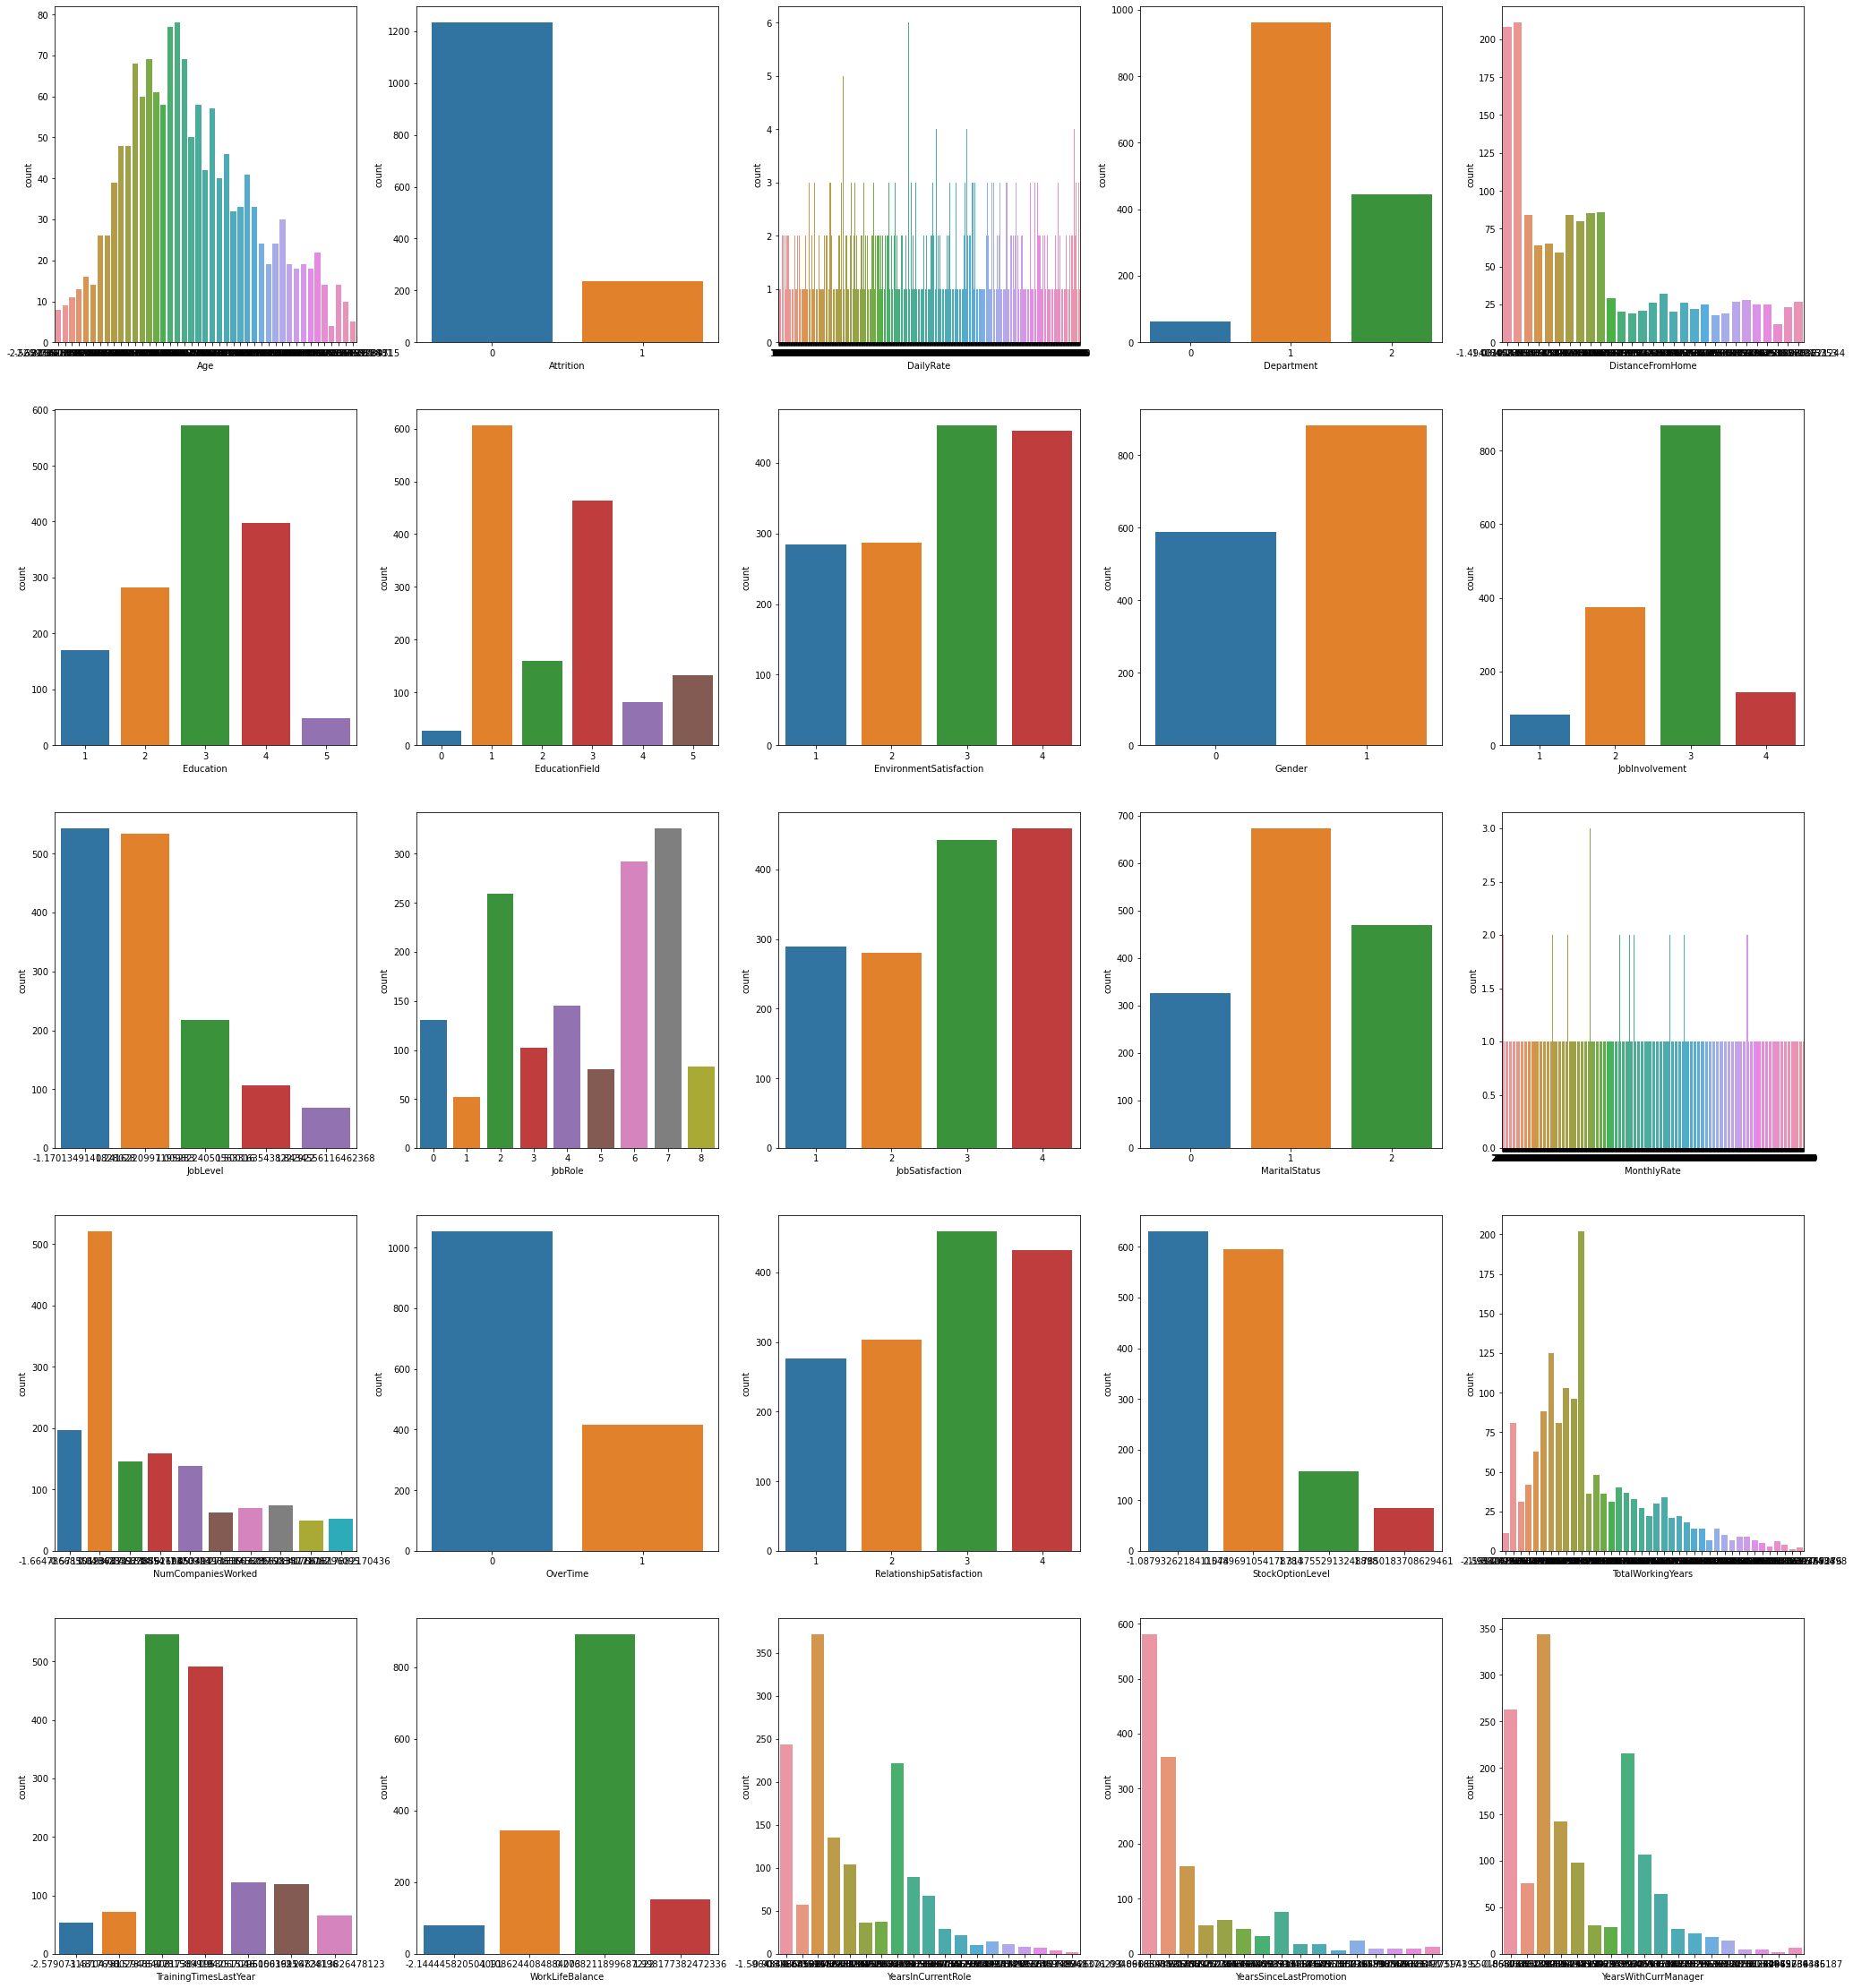

In [58]:
# let's see now how data is distributed for every column
plt.figure(figsize=(35,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=25 :
        ax=plt.subplot(5,5,plotnumber)
    
        sns.countplot(df[column])
        plt.xlabel(column, fontsize=10)
        
    
    plotnumber+=1
plt.show()

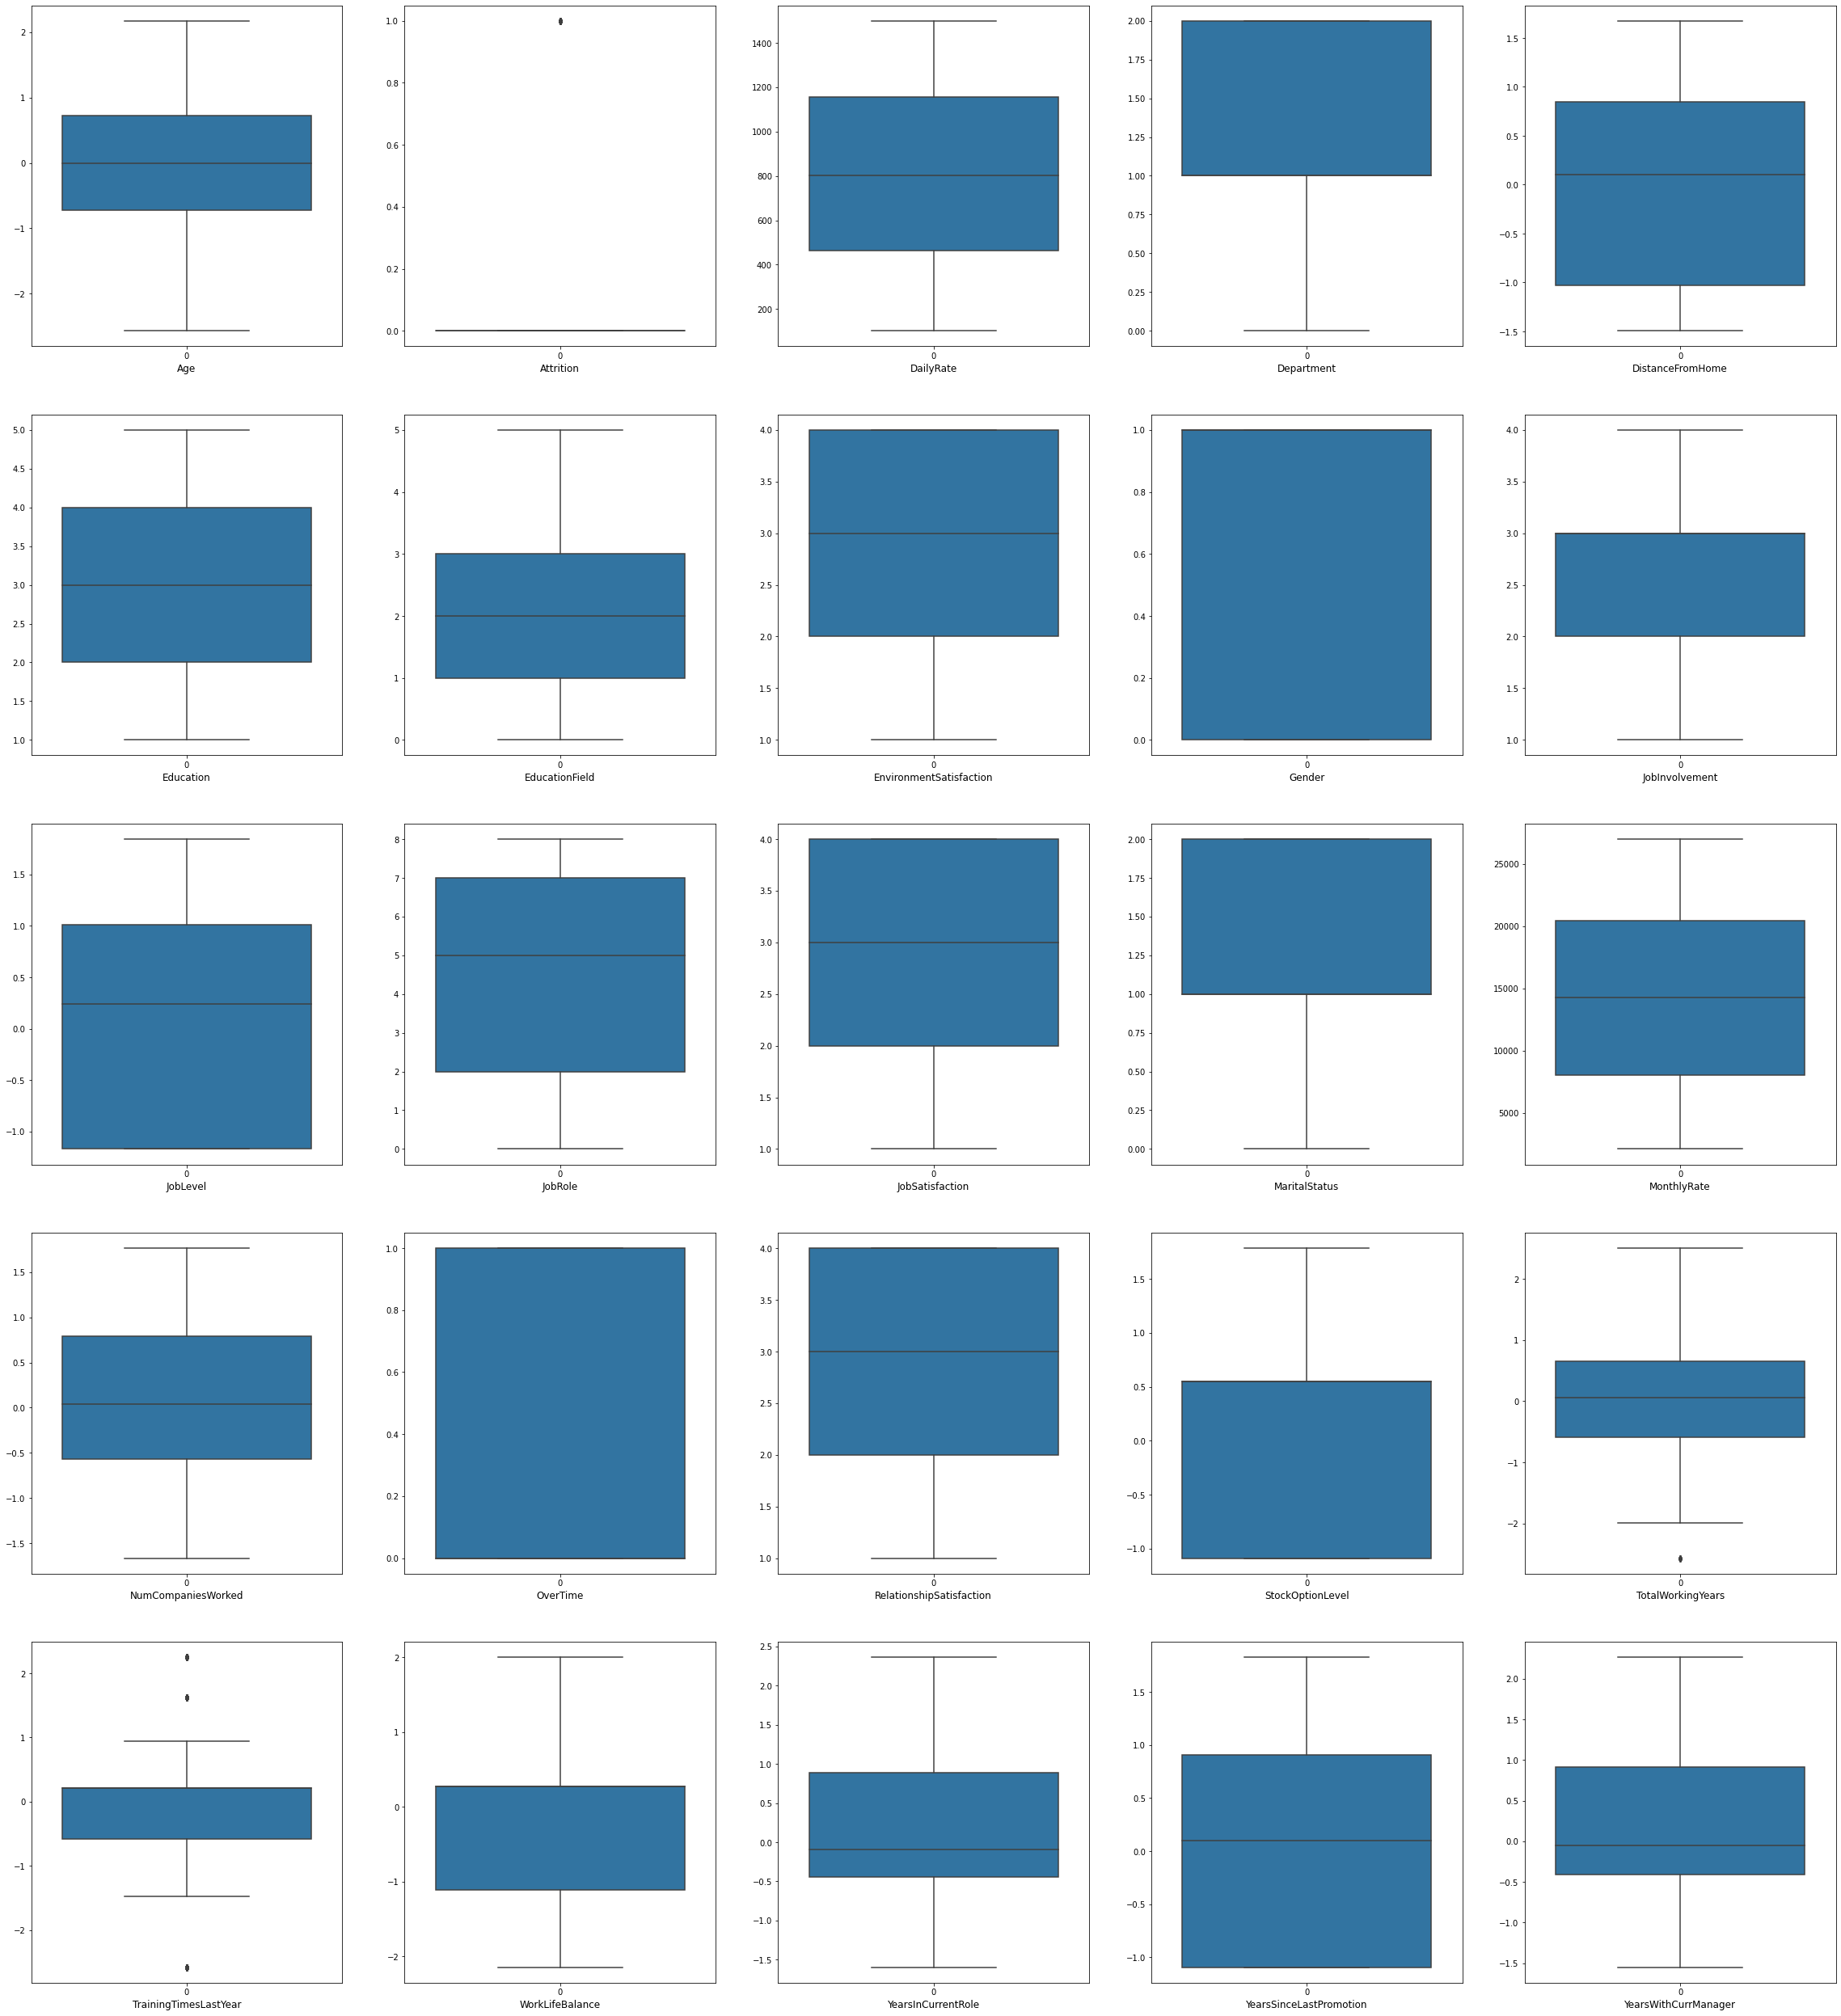

In [59]:
# Checking outlier using once again using boxplot
#Visualize the Outlier using BOXPLOT 

plt.figure(figsize=(40,45))
graph=1
for column in df:
    if graph<=25:      #26 denotes total number of columns
        plt.subplot(5,5,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=12)
    graph+=1
plt.show()

In [60]:
# Using Z-Score Method

from scipy import stats
df_outlier=df.copy()
z= np.abs(stats.zscore(df_outlier))
print(z)

           Age  Attrition  DailyRate  Department  DistanceFromHome  Education  \
0     0.522140   2.280906   0.742527    1.401512          1.494085   0.891688   
1     1.276411   0.438422   1.297775    0.493817          0.243416   1.868426   
2     0.102091   2.280906   1.414363    0.493817          1.031215   0.891688   
3     0.353971   0.438422   1.461466    0.493817          0.700347   1.061787   
4     1.123755   0.438422   0.524295    0.493817          1.031215   1.868426   
...        ...        ...        ...         ...               ...        ...   
1465  0.008279   0.438422   0.202082    0.493817          1.407126   0.891688   
1466  0.316210   0.438422   0.469754    0.493817          0.050827   1.868426   
1467  1.123755   0.438422   1.605183    0.493817          0.442291   0.085049   
1468  1.276411   0.438422   0.546677    1.401512          1.031215   0.085049   
1469  0.236188   0.438422   0.432568    0.493817          0.243416   0.085049   

      EducationField  Envir

In [61]:
#threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


It looks like we don't have any outlier present in our dataset.  

Looks great!! We will start our analysis with this data. Now let's check for MultiCollinearity in our data. But before that we should scale our data, and for that we can use StandardScaler

In [62]:
# Separating features and label

X=df.drop(columns=['Attrition'], axis=1)
y=df.Attrition

In [63]:
# Scaling the data using StandardScaler.
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [64]:

X_scaled.shape[1]       # [1] is index one, shows number of columns

24

# VIF

In [65]:
#finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/1-R2): here R2=actual-predicted
#this method help us to identify multicollinearity.

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [66]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

#let's check the values
vif

,vif,Features
0,2.098203,Age
1,1.018829,DailyRate
2,2.012452,Department
3,1.010053,DistanceFromHome
4,1.069014,Education
5,1.016892,EducationField
6,1.016022,EnvironmentSatisfaction
7,1.018473,Gender
8,1.015656,JobInvolvement
9,2.470918,JobLevel


All the vif are below 5, means we don't have multicolinearity in our data set. We can say its safe to proceed with this dataset.

# Using SelectKBest we will see which features are highly correlated with our target.

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

SelectKBest use f_classif method to select best features. And f_classif uses ANOVA test to determine the value

In [74]:
# separating features from label.
X=df.drop('Attrition', axis=1)
y=df.Attrition

In [76]:
best_features=SelectKBest(score_func=f_classif, k=24)    #taking appox top 90% of the features.
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)


#concatenate Dataframes
feature_scores= pd.concat([df_columns, df_scores],axis=1)

feature_scores.columns= ['Feature_Name', 'Score']   #name of output columns

print(feature_scores.nlargest(24,'Score'))     # print 24 best features.

                Feature_Name      Score
15                  OverTime  94.656457
18         TotalWorkingYears  71.027013
9                   JobLevel  58.394595
23      YearsWithCurrManager  50.840644
21        YearsInCurrentRole  50.819757
0                        Age  46.797439
17          StockOptionLevel  46.033047
12             MaritalStatus  39.599763
8             JobInvolvement  25.241985
11           JobSatisfaction  15.890004
6    EnvironmentSatisfaction  15.855209
3           DistanceFromHome   9.035418
10                   JobRole   6.649672
2                 Department   6.035877
19     TrainingTimesLastYear   5.534265
1                  DailyRate   4.726640
22   YearsSinceLastPromotion   4.369950
20           WorkLifeBalance   4.179877
16  RelationshipSatisfaction   3.095576
14        NumCompaniesWorked   2.073225
4                  Education   1.446308
7                     Gender   1.274587
5             EducationField   1.058726
13               MonthlyRate   0.337916


These are the Best 24 features with which we will continue our ML model building journey

In [78]:
# Now moving forward with these 24 features for final model building

X.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,1102,2,-1.494085,2,1,2,0,3,0.241622,...,1.621331,1,1,-1.087933,-0.244305,-2.579073,-2.144446,0.205562,-1.094862,0.490147
1,1.276411,279,1,0.243416,1,1,3,1,2,0.241622,...,-0.571302,0,4,0.548969,0.052495,0.217384,0.276821,0.883888,0.096854,0.909635
2,0.102091,1373,1,-1.031215,2,4,4,1,2,-1.170135,...,1.271339,1,2,-1.087933,-0.410500,0.217384,0.276821,-1.596434,-1.094862,-1.550156
3,-0.353971,1392,1,-0.700347,4,1,4,0,3,-1.170135,...,-0.571302,1,3,-1.087933,-0.244305,0.217384,0.276821,0.883888,0.905592,-1.550156
4,-1.123755,591,1,-1.031215,1,3,1,1,3,-1.170135,...,1.766182,0,4,0.548969,-0.592063,0.217384,0.276821,-0.446645,0.607464,-0.406881


In [79]:
X.shape  #  checking the dimension

(1470, 24)

In [80]:
y.shape 

(1470,)

Data looks good, Now we can move ahead with Model building.


# Model Building

In [81]:
# Spliting data into train and test, we are keeping 75% for training and 25% for testing.
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.25, random_state=43)


In [116]:
from collections import Counter
Counter(y_train)    # count the sample data.

Counter({0: 939, 1: 163})

We can see that difference between label classes are huge, Our model may act baised or over fitted towards one class. so we need to balance this for dealing with this imbalanced data we will use over sampling method. But before applying that, how our data work with imbalance samples.

# GradientBoostClassifier

In [82]:
#importing the library
from sklearn.ensemble import GradientBoostingClassifier


In [83]:
gbdt_clf =GradientBoostingClassifier()
gbdt_clf.fit(X_train, y_train)
pred= gbdt_clf.predict(X_train)

gbdt_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {gbdt_clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")

#Test score

pred=gbdt_clf.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("=====================Test Result========================")

print(f"Accuracy Score : {accuracy_score(y_test, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, pred)}\n")


      


=====================Train Result========================
Accuracy Score : 95.64%


CLASSIFICATION REPORT :
                     0           1  accuracy    macro avg  weighted avg
precision    0.951368    1.000000  0.956443     0.975684      0.958561
recall       1.000000    0.705521  0.956443     0.852761      0.956443
f1-score     0.975078    0.827338  0.956443     0.901208      0.953225
support    939.000000  163.000000  0.956443  1102.000000   1102.000000
-----------------------------------------------------------
Confusion Matrix : 
 [[939   0]
 [ 48 115]]

=====================Test Result========================
Accuracy Score : 85.05%


CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.856716   0.787879  0.850543    0.822298      0.842874
recall       0.976190   0.351351  0.850543    0.663771      0.850543
f1-score     0.912560   0.485981  0.850543    0.699270      0.826780
support    294.000000  74.000000  0.850543  368

In [84]:
# Hyper parameter tuning

grid_param={ 'max_depth': range(4,8),
           'min_samples_split': range(2,8,2),
           'learning_rate': np.arange(0.1, 0.3)}

In [85]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)

grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [86]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [87]:
gbdt_clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, min_samples_split= 2)

gbdt_clf.fit(X_train, y_train)

pred= gbdt_clf.predict(X_train)

gbdt_clf_report= pd.DataFrame(classification_report(y_train, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {gbdt_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

pred=gbdt_clf.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("=====================Test Result========================")

print(f"Accuracy Score : {accuracy_score(y_test, pred)*100:.2f}%")
print("\n")
print("------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, pred)}\n")


=====================Train Result========================
Accuracy Score : 98.73%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                    0           1  accuracy    macro avg  weighted avg
precision    0.98531    1.000000  0.987296     0.992655      0.987482
recall       1.00000    0.914110  0.987296     0.957055      0.987296
f1-score     0.99260    0.955128  0.987296     0.973864      0.987058
support    939.00000  163.000000  0.987296  1102.000000   1102.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[939   0]
 [ 14 149]]

=====================Test Result========================
Accuracy Score : 84.78%


------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.858434   0.750000  0.847826    0.804217      0.836629
recall       0.969388   0.364865  0.847826    0.667126      0.8

# Dealing with imbalanced data :
We can see our model is giving pretty good prediction but that might be the case because there is huge difference between the label classes(Yes/No). So just to make sure our model is not overfitting towards higher number class or in other words show baisness in the prediction let's deal with this imbalance data. For that we will do over sampling by using SMOTE Technique as we don't want any loss of data..

# SMOTE sampling technique¶

In [88]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [90]:
ove_smp= SMOTE(0.75)
X_train_ns, y_train_ns=ove_smp.fit_resample(X_train,y_train)

print("The number of classes before fit {}". format((Counter(y_train))))
print("The numberbof classes aftere fit {}".format((Counter(y_train_ns))))

The number of classes before fit Counter({0: 939, 1: 163})
The numberbof classes aftere fit Counter({0: 939, 1: 704})


Our sample data is balanced now, Now see how our model perform with these new training data.We will use this data in order to train our model.

# Logistic Regression

In [93]:

LR=LogisticRegression()
maxAccu=0   # maximum accuracy
maxRS=0    #best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train_ns,X_test,y_train_ns,y_test= train_test_split(X,y,test_size=0.25, random_state=i)
    LR.fit(X_train_ns,y_train_ns)   #fitting the data will train your model
    Y_pred=LR.predict(X_test)    # this is predicted target variable
    acc= accuracy_score(y_test,Y_pred)   # accuracy score
    print('Accuracy ', acc, 'Random state ', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Max accuracy ", maxAccu, " at random state ", i)
    


Accuracy  0.8505434782608695 Random state  1
Max accuracy  0.8505434782608695  at random state  1
Accuracy  0.8614130434782609 Random state  2
Max accuracy  0.8614130434782609  at random state  2
Accuracy  0.8641304347826086 Random state  3
Max accuracy  0.8641304347826086  at random state  3
Accuracy  0.8641304347826086 Random state  4
Accuracy  0.8478260869565217 Random state  5
Accuracy  0.8614130434782609 Random state  6
Accuracy  0.8586956521739131 Random state  7
Accuracy  0.8614130434782609 Random state  8
Accuracy  0.8668478260869565 Random state  9
Max accuracy  0.8668478260869565  at random state  9
Accuracy  0.8505434782608695 Random state  10
Accuracy  0.8641304347826086 Random state  11
Accuracy  0.8532608695652174 Random state  12
Accuracy  0.8586956521739131 Random state  13
Accuracy  0.8695652173913043 Random state  14
Max accuracy  0.8695652173913043  at random state  14
Accuracy  0.8586956521739131 Random state  15
Accuracy  0.8641304347826086 Random state  16
Accurac

Accuracy  0.8722826086956522 Random state  171
Accuracy  0.8777173913043478 Random state  172
Accuracy  0.8614130434782609 Random state  173
Accuracy  0.875 Random state  174
Accuracy  0.8940217391304348 Random state  175
Accuracy  0.875 Random state  176
Accuracy  0.8342391304347826 Random state  177
Accuracy  0.8586956521739131 Random state  178
Accuracy  0.8586956521739131 Random state  179
Accuracy  0.8641304347826086 Random state  180
Accuracy  0.8369565217391305 Random state  181
Accuracy  0.8722826086956522 Random state  182
Accuracy  0.8614130434782609 Random state  183
Accuracy  0.8342391304347826 Random state  184
Accuracy  0.8478260869565217 Random state  185
Accuracy  0.8559782608695652 Random state  186
Accuracy  0.8668478260869565 Random state  187
Accuracy  0.8532608695652174 Random state  188
Accuracy  0.8505434782608695 Random state  189
Accuracy  0.8369565217391305 Random state  190
Accuracy  0.8668478260869565 Random state  191
Accuracy  0.875 Random state  192
Accur

At random state 26, the accuracy is .8967

In [94]:
print("Best accuracy is ", maxAccu, "at random state ", maxRS)

Best accuracy is  0.9021739130434783 at random state  110


In [96]:
# creating train test split for best random state
X_train_ns,X_test,y_train_ns,y_test= train_test_split(X,y,test_size=0.25, random_state=26)

pred=LR.predict(X_train_ns)
LR_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {LR_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train, pred)}\n")


# Test score

y_pred=LR.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 79.49%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy    macro avg  weighted avg
precision    0.870681    0.719101  0.858439     0.794891      0.843859
recall       0.972437    0.328205  0.858439     0.650321      0.858439
f1-score     0.918750    0.450704  0.858439     0.684727      0.835929
support    907.000000  195.000000  0.858439  1102.000000   1102.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[863  76]
 [150  13]]

=====================Test Result========================
Accuracy Score : 91.03260869565217%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.922190   0.714286  0.910326    0.818238      0.898462
recall       0.981595   0.357143  0.910326 

In [97]:
# Cross Validation

from sklearn.model_selection import cross_val_score

# validating accuracy
scr= cross_val_score(LR, X, y, cv=10)
print("Cross Validation Score For Logistic Regression model : ", scr.mean())

Cross Validation Score For Logistic Regression model :  0.8578231292517007


# Ensemble Technique 

In [98]:
RF= RandomForestClassifier()

RF.fit(X_train_ns,y_train_ns)
pred=RF.predict(X_train_ns)
RF_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {RF_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

y_pred=RF.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    907.0  195.0       1.0     1102.0        1102.0


-----------------------------------------------------------
Confusion Matrix : 
 [[907   0]
 [  0 195]]

=====================Test Result========================
Accuracy Score : 91.03260869565217%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.915014   0.800000  0.910326    0.857507      0.901888
recall       0.990798   0.285714  0.910326    0.638256      0.910326
f1-score     0.951399   0.421053 

In [100]:
# Cross Validation: 

# Determining cross validation score.
scr= cross_val_score(RF,X,y,cv=10)
print("Cross validation Score of RandomForestClassifier model is : ", scr.mean())

Cross validation Score of RandomForestClassifier model is :  0.8537414965986395


In [101]:
# Hyper parameter tuning in RandomForestClassifier

RandomForestClassifier()

#creating parameter list to pass in GridSearchCV
parameters={'max_features': ['auto','sqrt','log2'],
           'n_estimators': range(10,100,10),
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [102]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring= "accuracy")
GCV.fit(X_train_ns,y_train_ns)    #fitting data into model
GCV.best_params_  # printing best parameter found by GridSearchCV

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 10}

In [103]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=10)

In [104]:
GCV_pred=GCV.best_estimator_.predict(X_test)   #predicting using best parameters
accuracy_score(y_test, GCV_pred)   # checking the accuracy

0.8913043478260869

# SVC

In [105]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train_ns,y_train_ns)
pred=svc.predict(X_train_ns)
svc_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {svc_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

y_pred=svc.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")



=====================Train Result========================
Accuracy Score : 82.30%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0      1  accuracy    macro avg  weighted avg
precision    0.823049    0.0  0.823049     0.411525      0.677410
recall       1.000000    0.0  0.823049     0.500000      0.823049
f1-score     0.902937    0.0  0.823049     0.451468      0.743161
support    907.000000  195.0  0.823049  1102.000000   1102.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[907   0]
 [195   0]]

=====================Test Result========================
Accuracy Score : 88.58695652173914%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0     1  accuracy   macro avg  weighted avg
precision    0.885870   0.0   0.88587    0.442935      0.784765
recall       1.000000   0.0   0.88587    0.500000      0.885870
f1-score     0

In [106]:
# Cross validation

scr=cross_val_score(svc, X, y, cv=9)
print("Cross Validation score for SVC model : ", scr.mean())

Cross Validation score for SVC model :  0.8387824829168538


# Decision TreeClassifier Model


In [107]:
DTC= DecisionTreeClassifier()
DTC.fit(X_train_ns,y_train_ns)
pred=DTC.predict(X_train_ns)
DTC_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {DTC_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

y_pred=DTC.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("=====================Test Result========================")
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)*100}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, y_pred)}\n")


=====================Train Result========================
Accuracy Score : 100.00%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    907.0  195.0       1.0     1102.0        1102.0


-----------------------------------------------------------
Confusion Matrix : 
 [[907   0]
 [  0 195]]

=====================Test Result========================
Accuracy Score : 79.34782608695652%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.905844   0.216667  0.793478    0.561255      0.827188
recall       0.855828   0.309524  0.793478    0.582676      0.793478
f1-score     0.880126   0.254902 

In [108]:
# Cross validation 

scr= cross_val_score(DTC,X,y, cv=10 )
print("Cross Validation score for DecisionTreeClassifier : ", scr.mean())

Cross Validation score for DecisionTreeClassifier :  0.7775510204081633


In [109]:
# Hyper parameter Tuning for DecisionTree

grid_param= {'criterion': ['gini', 'entropy'],
            'max_depth': range(10,15),
             'max_leaf_nodes': range(2,10),
             'min_samples_leaf': range(2,8)}

In [110]:
grid_search=GridSearchCV(estimator=DTC, param_grid=grid_param,
                         cv=5, n_jobs=-1)   # use all the cores in your system for performance improvement. 

In [111]:
grid_search.fit(X_train_ns,y_train_ns)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 2}

In [113]:
DTC=DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9, min_samples_leaf=2)
DTC.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=2)

In [114]:
DTC_pred=DTC.predict(X_test)

#check accuracy
accuracy_score(y_test, DTC_pred)

0.8695652173913043

# GradientBoostClassifier again with balanced sample data


In [117]:
gbdt_clf =GradientBoostingClassifier()
gbdt_clf.fit(X_train_ns, y_train_ns)
pred= gbdt_clf.predict(X_train_ns)

gbdt_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {gbdt_clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")

#Test score

pred=gbdt_clf.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("=====================Test Result========================")

print(f"Accuracy Score : {accuracy_score(y_test, pred)*100:.2f}%")
print("\n")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, pred)}\n")


      


=====================Train Result========================
Accuracy Score : 95.28%


CLASSIFICATION REPORT :
                     0           1  accuracy    macro avg  weighted avg
precision    0.947644    0.986395  0.952813     0.967019      0.954501
recall       0.997795    0.743590  0.952813     0.870692      0.952813
f1-score     0.972073    0.847953  0.952813     0.910013      0.950110
support    907.000000  195.000000  0.952813  1102.000000   1102.000000
-----------------------------------------------------------
Confusion Matrix : 
 [[905   2]
 [ 50 145]]

=====================Test Result========================
Accuracy Score : 89.95%


CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.921283   0.600000  0.899457    0.760641      0.884615
recall       0.969325   0.357143  0.899457    0.663234      0.899457
f1-score     0.944694   0.447761  0.899457    0.696227      0.887978
support    326.000000  42.000000  0.899457  368

In [118]:
#cross validation
scr= cross_val_score(gbdt_clf,X,y, cv=10 )
print("Cross Validation score for GradientBoostClassifier : ", scr.mean())

Cross Validation score for GradientBoostClassifier :  0.8639455782312924


In [119]:
# Hyper parameter tuning

grid_param={ 'max_depth': range(4,8),
           'min_samples_split': range(2,8,2),
           'learning_rate': np.arange(0.1, 0.3),
           'loss' : ['log_loss', 'deviance', 'exponential']}

In [121]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)

grid.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [122]:
grid.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'min_samples_split': 2}

In [123]:
gbdt_clf = GradientBoostingClassifier(learning_rate= 0.1,loss='deviance' ,max_depth= 4, min_samples_split= 2)

gbdt_clf.fit(X_train_ns, y_train_ns)

pred= gbdt_clf.predict(X_train_ns)

gbdt_clf_report= pd.DataFrame(classification_report(y_train_ns, pred, output_dict=True))

print("=====================Train Result========================")

print(f"Accuracy Score : {accuracy_score(y_train_ns, pred)*100:.2f}%")
print("\n")
print("---------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {gbdt_clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_train_ns, pred)}\n")


# Test score

pred=gbdt_clf.predict(X_test)
clf_report= pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("=====================Test Result========================")

print(f"Accuracy Score : {accuracy_score(y_test, pred)*100:.2f}%")
print("\n")
print("------------------------------------------------------------")
print(f"CLASSIFICATION REPORT :\n {clf_report}")
print("\n")
print("-----------------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test, pred)}\n")


=====================Train Result========================
Accuracy Score : 98.73%


---------------------------------------------------------------
CLASSIFICATION REPORT :
                     0           1  accuracy    macro avg  weighted avg
precision    0.984799    1.000000  0.987296     0.992400      0.987489
recall       1.000000    0.928205  0.987296     0.964103      0.987296
f1-score     0.992341    0.962766  0.987296     0.977554      0.987108
support    907.000000  195.000000  0.987296  1102.000000   1102.000000


-----------------------------------------------------------
Confusion Matrix : 
 [[907   0]
 [ 14 181]]

=====================Test Result========================
Accuracy Score : 89.40%


------------------------------------------------------------
CLASSIFICATION REPORT :
                     0          1  accuracy   macro avg  weighted avg
precision    0.920821   0.555556  0.894022    0.738188      0.879133
recall       0.963190   0.357143  0.894022    0.660167    

We can observe that our accuracy increases with the balanced training data set.

#  Let's plot ROC AUC Curve to Choose best model

In [124]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

In [125]:
LR= LogisticRegression()
DTC = DecisionTreeClassifier()
RF = RandomForestClassifier()
gbdt_clf= GradientBoostingClassifier()
svc= SVC()

In [126]:
# Train test split

x= df.drop(columns=['Attrition'], axis= 1)
y=df['Attrition']
x_train,x_test,Y_train,Y_test=train_test_split(x,y, test_size=0.25, random_state=41)

# Training with all classifier
LR.fit(x_train,Y_train)
DTC.fit(x_train,Y_train)
RF.fit(x_train, Y_train)
gbdt_clf.fit(x_train,Y_train)
svc.fit(x_train,Y_train)

print("All models are trained")

All models are trained


In [127]:
# All models score captured
LR.score(x_test,Y_test)
DTC.score(x_test,Y_test)
RF.score(x_test,Y_test)
gbdt_clf.score(x_test,Y_test)
svc.score(x_test,Y_test)

print("All models test score captured")

All models test score captured


# Let's check ROC_AUC for the fitted model

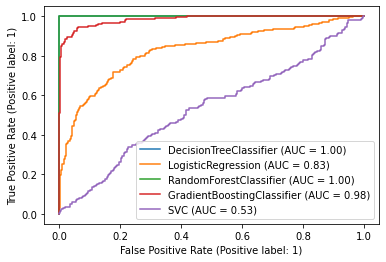

In [128]:
# how well our model perform on training data

disp= plot_roc_curve(DTC, x_train, Y_train)

plot_roc_curve(LR, x_train,Y_train, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(gbdt_clf, x_train,Y_train, ax=disp.ax_) 

plot_roc_curve(svc, x_train,Y_train, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()



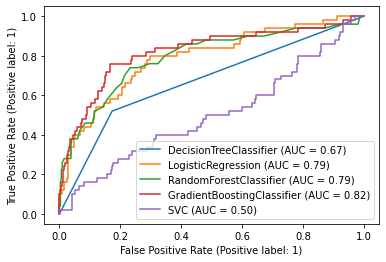

In [129]:
# How well our model works with test data

disp= plot_roc_curve(DTC, x_test, Y_test)

plot_roc_curve(LR, x_test,Y_test, ax=disp.ax_)   #ax_ means axes with confusion matrix

plot_roc_curve(RF, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(gbdt_clf, x_test,Y_test, ax=disp.ax_) 

plot_roc_curve(svc, x_test,Y_test, ax=disp.ax_) 

plt.legend(prop={'size' : 10}, loc= 'lower right')

plt.show()


WE can observe that Logistic Regression is better fit in our case, since its accuracy score for test and train model are almost on the same line. Although RandomForest and gradientboost shows higher result in train model but the difference between train and test model is huge comparitively. So we can pick Logistic Regression as our final model to save.

# Saving the model.


In [131]:
# Pickeling of file or serialization of a file.

import joblib
joblib.dump(LR, "HR_Analystics_project.pkl")

['HR_Analystics_project.pkl']